In [2]:
import networkx as nx
import matplotlib.pyplot as plt 
import pandas as pd 
import feather as ft 
import random 
import numpy as np
import statistics
import copy 

df=ft.read_dataframe('table_all.feather')

dc_Meso_index= pd.read_excel('dc_Meso_index.xlsx').set_index('Mesoregion') 
center_list_code=list(dc_Meso_index.loc[['Central Mineira','Metropolitana de Belo Horizonte'],'city_code']) 
north_list_code=list(dc_Meso_index.loc[['Noroeste de Minas','Norte de Minas'],'city_code']) 
east_list_code=list(dc_Meso_index.loc[['Jequitinhonha','Vale do Mucuri','Vale do Rio Doce'],'city_code']) 
south_list_code=list(dc_Meso_index.loc[['Campo das Vertentes','Oeste de Minas','Sul/​Sudoeste de Minas','Zona da Mata'],'city_code']) 
west_list_code=list(dc_Meso_index.loc[['Triângulo Mineiro/​Alto Paranaiba'],'city_code'])


df_city_code_latitude_longitude=pd.read_excel('df_city_code_latitude_longitude.xlsx',index_col=0)
list_municipality_code= df_city_code_latitude_longitude['municipality_code'].tolist()

In [14]:
pip install --user xlrd

  Using cached xlrd-1.2.0-py2.py3-none-any.whl (103 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
sample=df.iloc[:,[1,13,14,15,17,18,19,21,22,30,32]] #part of data that we need including

#remove importation exportation        
sample=sample.set_index('UF_de_Origem') 
sample=sample.loc[b'MG']
sample=sample.reset_index()
sample=sample.set_index('UF_de_Destino') 
sample=sample.loc[b'MG']
sample=sample.reset_index()

sample=sample.set_index('ano') 
sample=sample.loc[2013]
sample=sample.reset_index()
sample=sample.loc[sample['MONTH']<7] 
#sample=sample.loc[sample['DAY']<101] 
sample=sample.reset_index()
 
origin_code=sample['Codigo_do_Local_de_Origem'] #all origins in dataset_include itterable name len(origin_code) is not equal to the length of origin node in network(len(origin_code_unique)) 
destination_code=sample['Codigo_do_Local_de_Destino'] #all destinations in dataset_include itterable name 
origin_municipality_code=sample['Codigo_Municipio_de_Origem'] 
destination_municipality_code=sample['Codigo_Municipio_de_Destino']
number_animal=sample['animais']
#T_type=sample['Finalidade']


for i in range(len(origin_code)):
    if origin_code[i]== destination_code[i]:
        sample=sample.drop(i,axis=0)
        
        
        
#make a network        
DG=nx.DiGraph()       
for i in range(len(origin_code)):
    if origin_code[i] not in DG.nodes():
        city_code=origin_municipality_code[i]
        DG.add_node(origin_code[i], c_code=city_code)
        #find index of an element in a pandas DataFrame
        if city_code in list_municipality_code:
            j=list(df_city_code_latitude_longitude[df_city_code_latitude_longitude['municipality_code']==city_code].index.values)[0]
            DG.nodes[origin_code[i]]['latitude']=df_city_code_latitude_longitude.iloc[j,1]
            DG.nodes[origin_code[i]]['longitude']=df_city_code_latitude_longitude.iloc[j,2]
        if city_code in center_list_code:
            DG.nodes[origin_code[i]]['region']='Center'
        if city_code in north_list_code:
            DG.nodes[origin_code[i]]['region']='North'
        if city_code in east_list_code:
            DG.nodes[origin_code[i]]['region']='East'
        if city_code in south_list_code:
            DG.nodes[origin_code[i]]['region']='South'
        if city_code in west_list_code:
            DG.nodes[origin_code[i]]['region']='West'   
    
    if destination_code[i] not in DG.nodes():
        city_code=destination_municipality_code[i]
        DG.add_node(destination_code[i], c_code=city_code)
        if city_code in list_municipality_code:
            j=list(df_city_code_latitude_longitude[df_city_code_latitude_longitude['municipality_code']==city_code].index.values)[0]
            DG.nodes[destination_code[i]]['latitude']=df_city_code_latitude_longitude.iloc[j,1]
            DG.nodes[destination_code[i]]['longitude']=df_city_code_latitude_longitude.iloc[j,2]
        if city_code in center_list_code:
            DG.nodes[destination_code[i]]['region']='Center'
        if city_code in north_list_code:
            DG.nodes[destination_code[i]]['region']='North'
        if city_code in east_list_code:
            DG.nodes[destination_code[i]]['region']='East'
        if city_code in south_list_code:
            DG.nodes[destination_code[i]]['region']='South'
        if city_code in west_list_code:
            DG.nodes[destination_code[i]]['region']='West' 
    if (origin_code[i],destination_code[i]) not in DG.edges(): 
        DG.add_edge(origin_code[i],destination_code[i]) 
        DG.adj[origin_code[i]][destination_code[i]]['weight']=number_animal[i] 
    else: DG.adj[origin_code[i]][destination_code[i]]['weight']+=number_animal[i] 

        
list_weights=[]
for (u,v) in DG.edges():
        list_weights.append(DG.adj[u][v]['weight'])

In [314]:
#SI_region_risk
G=copy.deepcopy(DG)
#G=G.to_undirected()
beta=0.001 
infected_initial = initial_infecteds.copy()
first_ego_node= initial_infecteds.copy()
first_order_infected=[]    
    
    #make list of the nodes for each neighbors layer(here 1st, 2nd, 3rd,4th, 5th layer)
    #different layer means:first degree neighbors, second degree neighbors(neighbors of neighbors) and so on
all_previous_nodes=[]
lists_neighbors_node_layers=[]
for i in range(1,6):
    previous_layer_node=first_ego_node #the list of the nodes that we want to find their neighbors
    each_layer_list_neighbor_nodes=[]
    for node in previous_layer_node:
        if node not in all_previous_nodes: #avoid iteration of a node in list
            all_previous_nodes.append(node)
        each_node_neighbor=list(G.neighbors(node)) #make a list of a node neighbors
        for neigh in each_node_neighbor:
            if neigh not in all_previous_nodes:#if a node is a first degree neighbor of a node also third degree                if neigh not in all_previous_nodes:#if a node is a first degree neighbor of a node also  
                                                #neighbor of another node, we must assume it as first degree neighbor 
                                                #because of the shorthest path rule
                if neigh not in each_layer_list_neighbor_nodes:
                    if neigh not in initial_infecteds: #avoid iteration of a node 
                        each_layer_list_neighbor_nodes.append(neigh) # make a list of nodes for per target layer
    lists_neighbors_node_layers.append((i,len(each_layer_list_neighbor_nodes),each_layer_list_neighbor_nodes))#list of lists(5 list) of nodes in different layer
    first_ego_node=each_layer_list_neighbor_nodes #change ego node for the next loop   
    
        
    #start spread of infection and count how many nodes are infected in each layer in each step
infected_total=infected_initial

neigh_risk_1=[]
neigh_risk_2=[]
neigh_risk_3=[]
neigh_risk_4=[]
neigh_risk_5=[]
In_nodes_layer_1=0
In_nodes_layer_2=0
In_nodes_layer_3=0
In_nodes_layer_4=0
In_nodes_layer_5=0
    
infection_step=0 #to count how many times the spreading process iterate
    
    #infection process
neigh_risks_all=[]
#while infection_step<300: 
for i in range(400):
    #if set(all_previous_nodes) in infected_total:#condition to continue untill all our noted neighbors layer all be infected
    #    break
    infection_step+=1
    infected_1 =[]
    for node in infected_total: 
        if len(set(G.neighbors(node)))>0:
            neigh = list(G.neighbors(node))
            if len(neigh)==1:
                nei=neigh[0]
                if nei not in list(infected_total):
                    if  nei not in list(infected_1):
                        if random.random()<1-((1-beta)**G[node][nei]['weight']):
                            infected_1.append(nei)
            else:
                for nbr in neigh:
                    if nbr not in list(infected_total):
                        if  nbr not in list(infected_1):
                            if random.random()<1-((1-beta)**G[node][nbr]['weight']):
                                infected_1.append(nbr)
        #check that new infected node is belong to wich neighbors layer and
        #count the number of infected nodes in each layer in each step
    for node in infected_1:
        infected_total.append(node)
        if node in lists_neighbors_node_layers[0][2]:
            In_nodes_layer_1+=1
            first_order_infected.append(node)
        if node in lists_neighbors_node_layers[1][2]:
            In_nodes_layer_2+=1
        if node in lists_neighbors_node_layers[2][2]:
            In_nodes_layer_3+=1
        if node in lists_neighbors_node_layers[3][2]:
            In_nodes_layer_4+=1
        if node in lists_neighbors_node_layers[4][2]:
            In_nodes_layer_5+=1
        
    neigh_risk_1.append((infection_step,float(In_nodes_layer_1/lists_neighbors_node_layers[0][1])))
    neigh_risk_2.append((infection_step,float(In_nodes_layer_2/lists_neighbors_node_layers[1][1])))
    neigh_risk_3.append((infection_step,float(In_nodes_layer_3/lists_neighbors_node_layers[2][1])))        
    neigh_risk_4.append((infection_step,float(In_nodes_layer_4/lists_neighbors_node_layers[3][1])))                
    neigh_risk_5.append((infection_step,float(In_nodes_layer_5/lists_neighbors_node_layers[4][1])))        
    
    #for i in range(1,6):
#neigh_risks_all.append(neigh_risk_1,neigh_risk_2,neigh_risk_3,neigh_risk_4,neigh_risk_4,neigh_risk_5)    
        

Text(0.5, 1.0, 'a')

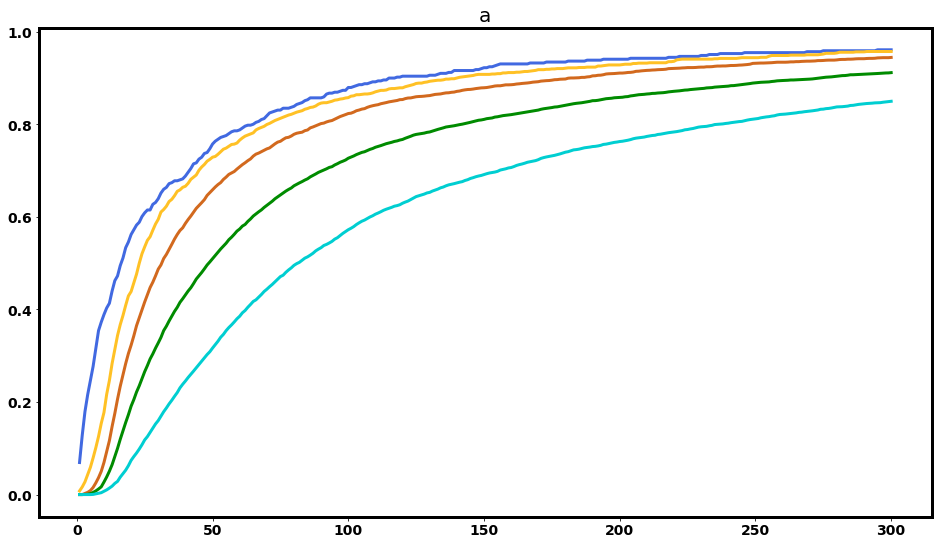

In [313]:
fig, ax = plt.subplots(1,1,figsize=(16,9))



plt.plot([neigh_risk_1_tuple[0] for neigh_risk_1_tuple in neigh_risk_1], [neigh_risk_1_tuple[1] for neigh_risk_1_tuple in neigh_risk_1],c='royalblue',label='original_network',linewidth=3.0)



plt.plot([neigh_risk_2_tuple[0] for neigh_risk_2_tuple in neigh_risk_2], [neigh_risk_2_tuple[1] for neigh_risk_2_tuple in neigh_risk_2],c='#FFC125',label='10%_uncertainty_on_community',linewidth=3.0)



plt.plot([neigh_risk_3_tuple[0] for neigh_risk_3_tuple in neigh_risk_3], [neigh_risk_3_tuple[1] for neigh_risk_3_tuple in neigh_risk_3],label='10%_uncertainty_on_entire_network',c='chocolate',linewidth=3.0)



plt.plot([neigh_risk_4_tuple[0] for neigh_risk_4_tuple in neigh_risk_4], [neigh_risk_4_tuple[1] for neigh_risk_4_tuple in neigh_risk_4],c='#008B00', label='50%_uncertainty_on_community',linewidth=3.0)

plt.plot([neigh_risk_5_tuple[0] for neigh_risk_5_tuple in neigh_risk_5], [neigh_risk_5_tuple[1] for neigh_risk_5_tuple in neigh_risk_5],c='darkturquoise', label='50%_uncertainty_on_community',linewidth=3.0)

#plt.plot(neigh_risk_1,label='50%_uncertainty_on_entire_network',c='darkturquoise',linewidth=3.0)




fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3)
#plt.xlim(0,100)
#plt.xlabel('')
#plt.ylabel('Incidence',fontsize=25)
plt.title('a',fontsize=20)
#plt.legend(fontsize=19)
#plt.savefig('risk_East_0.001_weight_animal.pdf')

In [221]:
a=0
for item in list(DG.predecessors( b'3814')):
    if item in initial_infecteds:
        a+=1
a       

265

In [3]:
def SI_region_risk(Graph,initial_infecteds):
    G=copy.deepcopy(Graph)
    beta=0.001 
    infected_initial = initial_infecteds.copy()
    
    
    infected_total=initial_infecteds.copy()
    center_risk=[(0,0)]
    south_risk=[(0,0)]
    north_risk=[(0,0)]
    west_risk=[(0,0)]
    east_risk=[(0,0)]
    In_center=0
    In_north=0
    In_west=0
    In_east=0
    In_south=0
    center_list_node=[node for node,info in G.nodes(data=True) if info['region']=='Center']
    north_list_node=[node for node,info in G.nodes(data=True) if info['region']=='North']
    south_list_node=[node for node,info in G.nodes(data=True) if info['region']=='South']
    east_list_node=[node for node,info in G.nodes(data=True) if info['region']=='East']
    west_list_node=[node for node,info in G.nodes(data=True) if info['region']=='West']
    number_of_nodes_graph=G.number_of_nodes()       
    infection_step=0 #to count how many times the spreading process iterate
    region_risks_all=[] #final list to be returned from function
    infected_node_list=[] #save the onfected node in each step for ploting the coloring map
    #infection process
    while infection_step<200:
    #len(infected_total)<number_of_nodes_graph:
        infection_step+=1
        infected_1 = list()
        for node in infected_total: 
            if len(set(G.neighbors(node)))>0:
                neigh = list(G.neighbors(node))
                if len(neigh)==1:
                    nei=neigh[0]
                    if nei not in list(infected_total):
                        if  nei not in list(infected_1):
                            if random.random()<1-((1-beta)**G[node][nei]['weight']):
                                infected_1.append(nei)
                else:
                    for nbr in set(G.neighbors(node)):
                        if nbr not in list(infected_total):
                            if  nbr not in list(infected_1):
                                if random.random()<1-((1-beta)**G[node][nbr]['weight']):
                                    infected_1.append(nbr)
        #check that new infected node is belong to wich neighbors layer and
        #count the number of infected nodes in each layer in each step
        infected_node_list.append((infection_step, infected_1))
        for node in infected_1:
            if node in center_list_node:
                In_center+=1
            if node in north_list_node:
                In_north+=1
            if node in south_list_node:
                In_south+=1
            if node in east_list_node:
                In_east+=1
            if node in west_list_node:
                In_west+=1
        
        center_risk.append((infection_step,float(In_center/len(center_list_node))))
        north_risk.append((infection_step,float(In_north/len(north_list_node))))
        east_risk.append((infection_step,float(In_east/len(east_list_node))))
        south_risk.append((infection_step,float(In_south/len(south_list_node))))
        west_risk.append((infection_step,float(In_west/len(west_list_node))))
        infected_total+=infected_1
    #for i in range(1,6):
    region_risks_all.append(('N',north_risk))
    region_risks_all.append(('E',east_risk))
    region_risks_all.append(('C',center_risk))
    region_risks_all.append(('W',west_risk))
    region_risks_all.append(('S',south_risk))
                                
                                
    return region_risks_all, infected_node_list

In [93]:
initial_infecteds=[node for node,info in DG.nodes(data=True) if info['region']=='West']
region_risk_of_south_2013, Infected_node_list_initial_south_2013=SI_region_risk(DG,initial_infecteds)

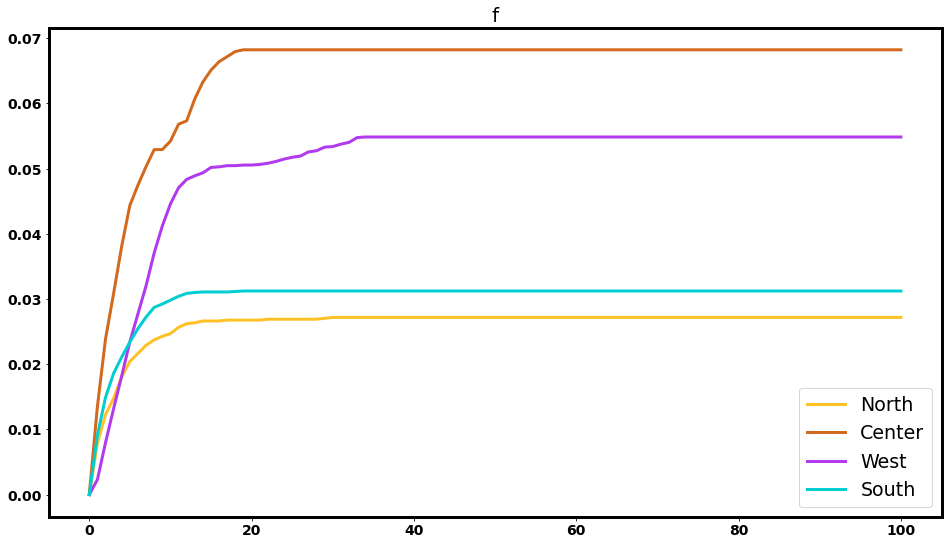

In [433]:
fig, ax = plt.subplots(1,1,figsize=(16,9))



plt.plot([north_infected[0] for north_infected in region_risk_of_east[0][1]],[north_infected[1] for north_infected in region_risk_of_east[0][1]],c='#FFC125',label='North',linewidth=3.0)


#plt.plot([east_infected[0] for east_infected in region_risk_of_east[1][1]],[east_infected[1] for east_infected in region_risk_of_east[1][1]],c='#008B00',label='East',linewidth=3.0)

plt.plot([center_infected[0] for center_infected in region_risk_of_east[2][1]],[center_infected[1] for center_infected in region_risk_of_east[2][1]],c='#D2691E',label='Center',linewidth=3.0)

plt.plot([west_infected[0] for west_infected in region_risk_of_east[3][1]], [west_infected[1] for west_infected in region_risk_of_east[3][1]],c='#B23AEE',label='West',linewidth=3.0)



plt.plot([south_infected[0] for south_infected in region_risk_of_east[4][1]],[south_infected[1] for south_infected in region_risk_of_east[4][1]],c='#00CED1', label='South',linewidth=3.0)





fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3)
#plt.xlim(0,100)
#plt.xlabel('')
#plt.ylabel('Incidence',fontsize=25)
plt.title('f',fontsize=20)
plt.legend(fontsize=19)
plt.savefig('risk_east_0.3_weight_animal_1month2013.pdf')

In [492]:
initial_infecteds_west=[node for node,info in DG.nodes(data=True) if info['region']=='West']
initial_infecteds_east=[node for node,info in DG.nodes(data=True) if info['region']=='East']
initial_infecteds_north=[node for node,info in DG.nodes(data=True) if info['region']=='North']
initial_infecteds_center=[node for node,info in DG.nodes(data=True) if info['region']=='Center']
initial_infecteds_south=[node for node,info in DG.nodes(data=True) if info['region']=='South']
DG_1month_west=DG.copy()
DG_1month_east=DG.copy()
DG_1month_south=DG.copy()
DG_1month_center=DG.copy()
DG_1month_north=DG.copy()


In [ ]:
#netwrok with west initial infected for coloring map
for node in DG_west:
    DG_west.nodes[node]['infection_step']=None
for item in Infected_node_list_initial_west:
    i=item[0]
    if i<=2:
        for node in item[1]:
            DG_west.nodes[node]['infection_step']=1
    if 2<i<=5:
        for node in item[1]:
            DG_west.nodes[node]['infection_step']=2
    if 5<i<=10:
        for node in item[1]:
            DG_west.nodes[node]['infection_step']=3
    if 10<i<=17:
        for node in item[1]:
            DG_west.nodes[node]['infection_step']=4
    if 17<i<=24:
        for node in item[1]:
            DG_west.nodes[node]['infection_step']=5
    if 50<i<=60:
        for node in item[1]:
            DG.nodes[node]['infection_step']=6
    if 60<i<=70:
        for node in item[1]:
            DG_west.nodes[node]['infection_step']=7
    if 70<i<=80:
        for node in item[1]:
            DG_west.nodes[node]['infection_step']=8
    if 80<i<=90:
        for node in item[1]:
            DG_west.nodes[node]['infection_step']=9
    if 90<i<100:
        for node in item[1]:
            DG_west.nodes[node]['infection_step']=10
for node in initial_infecteds_west:
    DG_west.nodes[node]['infection_step']=6

for node in DG_west:
    if DG_west.nodes[node]['infection_step'] is None:            
        DG_west.nodes[node]['infection_step']=7 
        
#netwrok with north initial infected for coloring map
for node in DG_north:
    DG_north.nodes[node]['infection_step']=None
for item in Infected_node_list_initial_north:
    i=item[0]
    if i<=2:
        for node in item[1]:
            DG_north.nodes[node]['infection_step']=1
    if 2<i<=5:
        for node in item[1]:
            DG_north.nodes[node]['infection_step']=2
    if 5<i<=10:
        for node in item[1]:
            DG_north.nodes[node]['infection_step']=3
    if 10<i<=17:
        for node in item[1]:
            DG_north.nodes[node]['infection_step']=4
    if 17<i<=24:
        for node in item[1]:
            DG_north.nodes[node]['infection_step']=5
    if 50<i<=60:
        for node in item[1]:
            DG_north.nodes[node]['infection_step']=6
    if 60<i<=70:
        for node in item[1]:
            DG_north.nodes[node]['infection_step']=7
    if 70<i<=80:
        for node in item[1]:
            DG_north.nodes[node]['infection_step']=8
    if 80<i<=90:
        for node in item[1]:
            DG_north.nodes[node]['infection_step']=9
    if 90<i<100:
        for node in item[1]:
            DG_north.nodes[node]['infection_step']=10
for node in initial_infecteds_west:
    DG_west.nodes[node]['infection_step']=6

for node in DG_west:
    if DG_north.nodes[node]['infection_step'] is None:            
        DG_north.nodes[node]['infection_step']=7 

In [454]:
import geopandas as gpd
import pandas as pd

dc=gpd.read_file('31MUE250GC_SIR.shp')

#alocate to each node(place) a city_name

city_code_name=list(dc[['NM_MUNICIP','CD_GEOCMU']].values)
for node in list(DG.nodes):
    for i in range(len(city_code_name)):
        if DG.nodes[node]['c_code']==int(city_code_name[i][1]):
            DG.nodes[node]['c_name']=city_code_name[i][0]

            
#count how many premises are in each city
city_names_of_nodes=nx.get_node_attributes(DG,'c_name')
city_names_of_nodes_list=list(city_names_of_nodes.values())


#distribution function
def dist_dataframe(list_t):
    T_1SU=np.unique(list_t)
    dist=pd.DataFrame(columns=['NM_MUNICIP','number_of_premises'])# I use 'NM_MUNICIP' for column name to be similar to the column in MG geo data fram(dc)
    for x in T_1SU:
        C=list_t.count(x)
        dist=dist.append([{'NM_MUNICIP':x, 'number_of_premises':C}], ignore_index =True)
    return dist
#count number of node in each city in network
city_name_count=dist_dataframe(city_names_of_nodes_list)

#add the number of premises in each city as a column to the geopandas data of cities geographical information
dc.insert(3, 'number_of_premises', True)
dc=dc=dc.sort_values(by='NM_MUNICIP').set_index('NM_MUNICIP').reset_index()
city_name_count=city_name_count.sort_values('NM_MUNICIP').set_index('NM_MUNICIP').reset_index()
dc['number_of_premises']=city_name_count['number_of_premises']

#count how mmany percent of number of premises in each city is infected in each step.

 #first assumption: when the first node in a city is infected we assume that city as infected and color it.
    
 #allocate zero value as infection step to cities of initial infected nodes. it will be needed for plot a targeted coloring map
in_city_in_step=dc.copy()
in_city_in_step['infection_step']=None
for node in initial_infecteds_west:
    c_name=DG.nodes[node]['c_name']
    i=in_city_in_step[in_city_in_step['NM_MUNICIP']==c_name].index.values
    #if in_city_in_step.loc[i,'infection_step'] is True: it does not work like this. because python is khar and does not understand
                                                        # this and consider in_city_in_step.loc[i,'infection_step'] as an aaray not an element
                                                        # so you should make an element from it like the thing in following line
    if list(in_city_in_step.loc[i,'infection_step'])[0] is None:
        in_city_in_step.loc[i,'infection_step']=0


In [513]:
in_city_in_step=dc.copy()
in_city_in_step['infection_step']=None
for node in initial_infecteds_east:
    c_name=DG.nodes[node]['c_name']
    i=in_city_in_step[in_city_in_step['NM_MUNICIP']==c_name].index.values
    #if in_city_in_step.loc[i,'infection_step'] is True: it does not work like this. because python is khar and does not understand
                                                        # this and consider in_city_in_step.loc[i,'infection_step'] as an aaray not an element
                                                        # so you should make an element from it like the thing in following line
    if list(in_city_in_step.loc[i,'infection_step'])[0] is None:
        in_city_in_step.loc[i,'infection_step']=-5
for item in Infected_node_list_initial_east:
    infection_step=item[0]
    for node in item[1]:
        c_name=DG.nodes[node]['c_name']
        i=in_city_in_step[in_city_in_step['NM_MUNICIP']==c_name].index.values
        if list(in_city_in_step.loc[i,'infection_step'])[0] is None:
            in_city_in_step.loc[i,'infection_step']=infection_step


In [511]:
in_city_in_step['infection_step']=in_city_in_step['infection_step'].fillna(20)

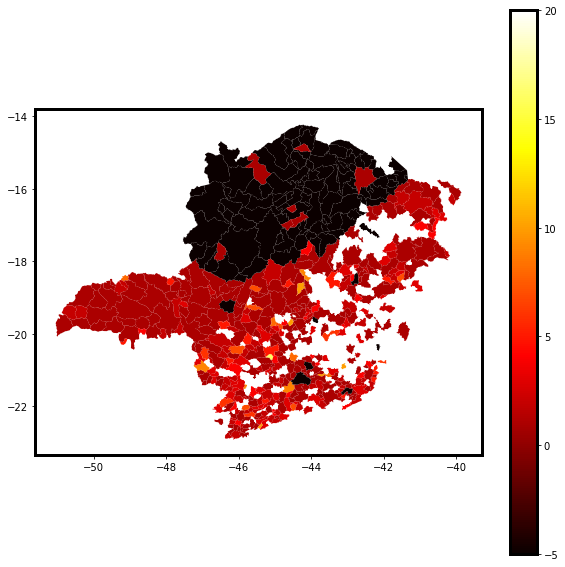

In [512]:
fig, ax = plt.subplots(1, 1, figsize=[10,10])

in_city_in_step.plot(column='infection_step',cmap='hot', ax=ax, legend=True)#'RdYlGn'
plt.savefig('map_1month_risk_INeast.pdf')

In [4]:
#make a function which give a network of dataset related to n days
def network_part_time(dataset, n_day):
    data=dataset.iloc[:,[13,14,15,17,18,19,21,22,30]]
    #remove importation exportation        
    data=data.set_index('UF_de_Origem') 
    data=data.loc[b'MG']
    data=data.reset_index()
    data=data.set_index('UF_de_Destino') 
    data=data.loc[b'MG']
    data=data.reset_index()


    data=data.set_index('ano') 
    data=data.loc[2013]
    data=data.reset_index()

    data=data.loc[data['DAY']<n_day] 
    data=data.reset_index()
 
    origin_code=data['Codigo_do_Local_de_Origem'] #all origins in dataset_include itterable name len(origin_code) is not equal to the length of origin node in network(len(origin_code_unique)) 
    destination_code=data['Codigo_do_Local_de_Destino'] #all destinations in dataset_include itterable name 
    origin_municipality_code=data['Codigo_Municipio_de_Origem'] 
    destination_municipality_code=data['Codigo_Municipio_de_Destino']
    number_animal=data['animais']
        
        
    #make a network        
    G=nx.DiGraph()       
    for i in range(len(origin_code)):
        if origin_code[i] not in G.nodes():
            city_code=origin_municipality_code[i]
            G.add_node(origin_code[i], c_code=city_code)
    
            if city_code in center_list_code:
                G.nodes[origin_code[i]]['region']='Center'
            if city_code in north_list_code:
                G.nodes[origin_code[i]]['region']='North'
            if city_code in east_list_code:
                G.nodes[origin_code[i]]['region']='East'
            if city_code in south_list_code:
                G.nodes[origin_code[i]]['region']='South'
            if city_code in west_list_code:
                G.nodes[origin_code[i]]['region']='West'   
    
        if destination_code[i] not in G.nodes():
            city_code=destination_municipality_code[i]
            G.add_node(destination_code[i], c_code=city_code)

            if city_code in center_list_code:
                G.nodes[destination_code[i]]['region']='Center'
            if city_code in north_list_code:
                G.nodes[destination_code[i]]['region']='North'
            if city_code in east_list_code:
                G.nodes[destination_code[i]]['region']='East'
            if city_code in south_list_code:
                G.nodes[destination_code[i]]['region']='South'
            if city_code in west_list_code:
                G.nodes[destination_code[i]]['region']='West' 
        if (origin_code[i],destination_code[i]) not in G.edges(): 
            G.add_edge(origin_code[i],destination_code[i]) 
            G.adj[origin_code[i]][destination_code[i]]['weight']=number_animal[i] 
        else: G.adj[origin_code[i]][destination_code[i]]['weight']+=number_animal[i] 

    return G




In [9]:
north_saturation=[(0,(0,0))]
east_saturation=[(0,(0,0))]
center_saturation=[(0,(0,0))]
west_saturation=[(0,(0,0))]
south_saturation=[(0,(0,0))]
for d in range(2,102):#for 100 days. it is 102 because th range in going to 101 and the graph is making <101
    G=network_part_time(df,d)
    initial_infecteds_west=[node for node,info in G.nodes(data=True) if info['region']=='West']
    risk,node_list=SI_region_risk(G,initial_infecteds_west)
    
    #find the amount of saturation
    for item in risk:
        if item[0]=='N':
            risk_list=item[1]
            north_saturation.append([d-1,risk_list[-1]])
            
        if item[0]=='E':
            risk_list=item[1]
            east_saturation.append([d-1,risk_list[-1]])
            
        if item[0]=='C':
            risk_list=item[1]
            center_saturation.append([d-1,risk_list[-1]])
            
        if item[0]=='W':
            risk_list=item[1]
            west_saturation.append([d-1,risk_list[-1]])
             
        if item[0]=='S':
            risk_list=item[1]
            south_saturation.append([d-1,risk_list[-1]])

In [19]:
north_saturation4=[(0,(0,0))]
east_saturation4=[(0,(0,0))]
center_saturation4=[(0,(0,0))]
west_saturation4=[(0,(0,0))]
south_saturation4=[(0,(0,0))]
for d in range(2,102):#for 100 days. it is 102 because th range in going to 101 and the graph is making <101
    G=network_part_time(df,d)
    initial_infecteds_south=[node for node,info in G.nodes(data=True) if info['region']=='South']
    risk4,node_list4=SI_region_risk(G,initial_infecteds_south)
    
    #find the amount of saturation
    for item in risk4:
        if item[0]=='N':
            risk_list=item[1]
            north_saturation4.append([d-1,risk_list[-1]])
            
        if item[0]=='E':
            risk_list=item[1]
            east_saturation4.append([d-1,risk_list[-1]])
            
        if item[0]=='C':
            risk_list=item[1]
            center_saturation4.append([d-1,risk_list[-1]])
            
        if item[0]=='W':
            risk_list=item[1]
            west_saturation4.append([d-1,risk_list[-1]])
             
        if item[0]=='S':
            risk_list=item[1]
            south_saturation4.append([d-1,risk_list[-1]])

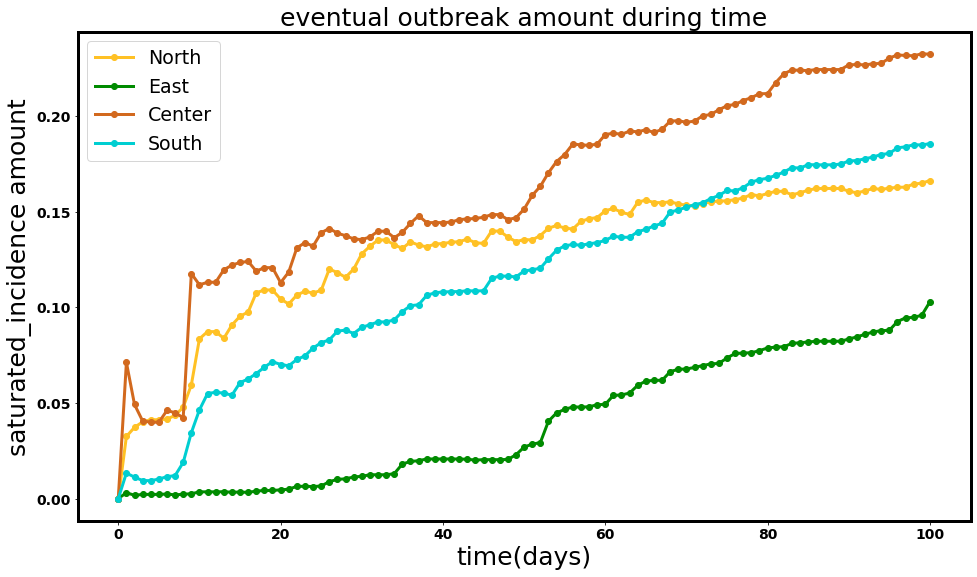

In [106]:
#plot saturation lines
fig, ax = plt.subplots(1,1,figsize=(16,9))


plt.plot([north_saturation_item[0] for north_saturation_item in north_saturation], [item_1[1] for item_1 in [item[1] for item in north_saturation]],marker='o',c='#FFC125',label='North',linewidth=3.0)

plt.plot([east_saturation_item[0] for east_saturation_item in east_saturation], [item_1[1] for item_1 in [item[1] for item in east_saturation]],marker='o',c='#008B00',label='East',linewidth=3.0)

plt.plot([center_saturation_item[0] for center_saturation_item in center_saturation], [item_1[1] for item_1 in [item[1] for item in center_saturation]],marker='o',c='#D2691E',label='Center',linewidth=3.0)

#plt.plot([west_saturation_item[0] for west_saturation_item in west_saturation],[item_1[1] for item_1 in [item[1] for item in west_saturation]],c='#B23AEE',label='West',linewidth=3.0)

plt.plot([south_saturation_item[0] for south_saturation_item in south_saturation], [item_1[1] for item_1 in [item[1] for item in south_saturation]],marker='o',c='#00CED1',label='South',linewidth=3.0)


fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('time(days)',fontsize=25)
plt.ylabel('saturated_incidence amount',fontsize=25)
plt.title('eventual outbreak amount during time',fontsize=25)
plt.legend(fontsize=19)
plt.savefig('saturation_region_100days_INWest.pdf')
plt.show()


In [49]:
north_saturation_allIn=pd.DataFrame(list(range(0,101)), columns=['days'])
east_saturation_allIn=pd.DataFrame(list(range(0,101)), columns=['days'])
center_saturation_allIn=pd.DataFrame(list(range(0,101)), columns=['days'])
west_saturation_allIn=pd.DataFrame(list(range(0,101)), columns=['days'])
south_saturation_allIn=pd.DataFrame(list(range(0,101)), columns=['days'])

In [50]:
# region_saturation is related to west as initial infected/ region_saturation1 is related to north as initial infected
#/region_saturation2 is related to east as initial infected/region_saturation3 is related to center as initial infected
#/region_saturation4 is related to south as initial infected
north_saturation_allIn.insert(1, 'vals_1', [north_saturation2_item[1][1] for north_saturation2_item in north_saturation2])
north_saturation_allIn.insert(2, 'vals_2', [north_saturation3_item[1][1] for north_saturation3_item in north_saturation3])
north_saturation_allIn.insert(3, 'vals_3', [north_saturation_item[1][1] for north_saturation_item in north_saturation])
north_saturation_allIn.insert(4, 'vals_4', [north_saturation4_item[1][1] for north_saturation4_item in north_saturation4])
east_saturation_allIn.insert(1, 'vals_1', [east_saturation1_item[1][1] for east_saturation1_item in east_saturation1])
east_saturation_allIn.insert(2, 'vals_2', [east_saturation3_item[1][1] for east_saturation3_item in east_saturation3])
east_saturation_allIn.insert(3, 'vals_3', [east_saturation_item[1][1] for east_saturation_item in east_saturation])
east_saturation_allIn.insert(4, 'vals_4', [east_saturation4_item[1][1] for east_saturation4_item in east_saturation4])
center_saturation_allIn.insert(1, 'vals_1', [center_saturation1_item[1][1] for center_saturation1_item in center_saturation1])
center_saturation_allIn.insert(2, 'vals_2', [center_saturation2_item[1][1] for center_saturation2_item in center_saturation2])
center_saturation_allIn.insert(3, 'vals_3', [center_saturation_item[1][1] for center_saturation_item in center_saturation])
center_saturation_allIn.insert(4, 'vals_4', [center_saturation4_item[1][1] for center_saturation4_item in center_saturation4])
west_saturation_allIn.insert(1, 'vals_1', [west_saturation1_item[1][1] for west_saturation1_item in west_saturation1])
west_saturation_allIn.insert(2, 'vals_2', [west_saturation2_item[1][1] for west_saturation2_item in west_saturation2])
west_saturation_allIn.insert(3, 'vals_3', [west_saturation3_item[1][1] for west_saturation3_item in west_saturation3])
west_saturation_allIn.insert(4, 'vals_4', [west_saturation4_item[1][1] for west_saturation4_item in west_saturation4])
south_saturation_allIn.insert(1, 'vals_1', [south_saturation1_item[1][1] for south_saturation1_item in south_saturation1])
south_saturation_allIn.insert(2, 'vals_2', [south_saturation2_item[1][1] for south_saturation2_item in south_saturation2])
south_saturation_allIn.insert(3, 'vals_3', [south_saturation3_item[1][1] for south_saturation3_item in south_saturation3])
south_saturation_allIn.insert(4, 'vals_4', [south_saturation_item[1][1] for south_saturation_item in south_saturation])

In [48]:
east_saturation_allIn

,days,vals_1,vals_2,vals_3,vals_4
0,0,0.000000,0.000000,0.000000,0.000000
1,1,0.003077,0.018462,0.003077,0.030769
2,2,0.011905,0.015306,0.001701,0.025510
3,3,0.013029,0.017372,0.002172,0.022801
4,4,0.012973,0.017297,0.002162,0.022703
...,...,...,...,...,...
96,96,0.100255,0.098941,0.092525,0.109531
97,97,0.101279,0.100746,0.094502,0.111103
98,98,0.101844,0.100941,0.094693,0.111253
99,99,0.102621,0.102324,0.095864,0.111829


In [51]:
#getting average
#North
north_saturation_allIn= north_saturation_allIn.set_index('days')
mean_val_north = north_saturation_allIn.iloc[:,0:].mean(axis=1)
std_val_north=north_saturation_allIn.iloc[:,0:].std(axis=1)
min_val_north = mean_val_north - 2*std_val_north
max_val_north = mean_val_north + 2*std_val_north
north_saturation_allIn.reset_index(inplace = True)
#East'days'
east_saturation_allIn= east_saturation_allIn.set_index('days')
mean_val_east = east_saturation_allIn.iloc[:,0:].mean(axis=1)
std_val_east=east_saturation_allIn.iloc[:,0:].std(axis=1)
min_val_east = mean_val_east - 2*std_val_east
max_val_east = mean_val_east + 2*std_val_east
east_saturation_allIn.reset_index(inplace = True)
#Center
center_saturation_allIn= center_saturation_allIn.set_index('days')
mean_val_center = center_saturation_allIn.iloc[:,0:].mean(axis=1)
std_val_center=center_saturation_allIn.iloc[:,0:].std(axis=1)
min_val_center = mean_val_center - 2*std_val_center
max_val_center= mean_val_center + 2*std_val_center
center_saturation_allIn.reset_index(inplace = True)
#West
west_saturation_allIn= west_saturation_allIn.set_index('days')
mean_val_west = west_saturation_allIn.iloc[:,0:].mean(axis=1)
std_val_west=west_saturation_allIn.iloc[:,0:].std(axis=1)
min_val_west = mean_val_west - 2*std_val_west
max_val_west= mean_val_west + 2*std_val_west
west_saturation_allIn.reset_index(inplace = True)
#South
south_saturation_allIn= south_saturation_allIn.set_index('days')
mean_val_south = south_saturation_allIn.iloc[:,0:].mean(axis=1)
std_val_south=south_saturation_allIn.iloc[:,0:].std(axis=1)
min_val_south = mean_val_south - 2*std_val_south
max_val_south= mean_val_south+ 2*std_val_south
south_saturation_allIn.reset_index(inplace = True)

NameError: name 'north_saturation_allIn' is not defined

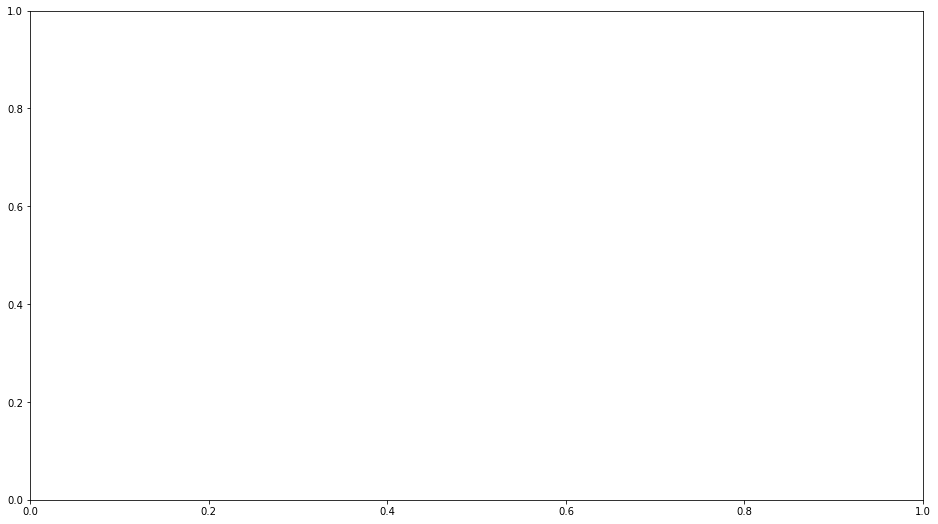

In [15]:
#plot
#scatter plot

fig, ax = plt.subplots(1,1,figsize=(16,9))

for i in range(1,5):
    ax=north_saturation_allIn.plot.scatter(ax=ax,x='days', y=f"vals_{i}",c='#FFC125', marker='*',alpha=0.5)

plt.plot(north_saturation_allIn['days'], mean_val_north,c='#FFC125',label='North',linewidth=3.0)


for i in range(1,5):
    ax=east_saturation_allIn.plot.scatter(ax=ax,x='days', y=f"vals_{i}",c='#008B00', marker='*',alpha=0.5)

plt.plot(east_saturation_allIn['days'], mean_val_east,c='#008B00',label='East',linewidth=3.0)


for i in range(1,5):
    ax=center_saturation_allIn.plot.scatter(ax=ax,x='days', y=f"vals_{i}",c='#D2691E', marker='*',alpha=0.5)

plt.plot(center_saturation_allIn['days'], mean_val_center,c='#D2691E',label='Center',linewidth=3.0)

for i in range(1,5):
    ax=west_saturation_allIn.plot.scatter(ax=ax,x='days', y=f"vals_{i}",c='#B23AEE', marker='*',alpha=0.5)

plt.plot(west_saturation_allIn['days'], mean_val_west,c='#B23AEE',label='West',linewidth=3.0)

for i in range(1,5):
    ax=south_saturation_allIn.plot.scatter(ax=ax,x='days', y=f"vals_{i}",c='#00CED1', marker='*',alpha=0.5)

plt.plot(south_saturation_allIn['days'], mean_val_south,c='#00CED1',label='South',linewidth=3.0)


fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('size of the network',fontsize=25)
plt.ylabel('saturation amount related to region',fontsize=25)
plt.title('Average of eventual outbreak',fontsize=25)
plt.legend(fontsize=19)
#plt.savefig('avg_region_saturation_SI_100days.pdf')


# for saturation point we can see the data from other vision:
we want to find out if we choose n day of dataset randomely, is the saturation point for each region is approximately constant or it will be different. for example for 30 days, the30 days of first month reach to a saturation value very different in comparable to 30 day of second month, or 30 day of third month

we want to know if the number of days matter in the amount of saturatuion point
********watch about number of days, when you decide to change for example from 100 to 60, pay attention that you should change all the 101 ones in different pandas datasets to 61

In [5]:
#make a function which give a network of dataset related to b-a=n optional days from each part of dataset I want
def network_optionalpart_days(dataset, a, b):
    data=dataset.iloc[:,[13,14,15,17,18,19,21,22,30]]
    #remove importation exportation        
    data=data.set_index('UF_de_Origem') 
    data=data.loc[b'MG']
    data=data.reset_index()
    data=data.set_index('UF_de_Destino') 
    data=data.loc[b'MG']
    data=data.reset_index()


    data=data.set_index('ano') 
    data=data.loc[2013]
    data=data.reset_index()

    data=data[(a<data['DAY'])&(data['DAY']<b)] #the first day of Jan and the first day of July for drawing network
    data=data.reset_index()
 
    origin_code=data['Codigo_do_Local_de_Origem'] #all origins in dataset_include itterable name len(origin_code) is not equal to the length of origin node in network(len(origin_code_unique)) 
    destination_code=data['Codigo_do_Local_de_Destino'] #all destinations in dataset_include itterable name 
    origin_municipality_code=data['Codigo_Municipio_de_Origem'] 
    destination_municipality_code=data['Codigo_Municipio_de_Destino']
    number_animal=data['animais']
        
        
    #make a network        
    G=nx.DiGraph()       
    for i in range(len(origin_code)):
        if origin_code[i] not in G.nodes():
            city_code=origin_municipality_code[i]
            G.add_node(origin_code[i], c_code=city_code)
    
            if city_code in center_list_code:
                G.nodes[origin_code[i]]['region']='Center'
            if city_code in north_list_code:
                G.nodes[origin_code[i]]['region']='North'
            if city_code in east_list_code:
                G.nodes[origin_code[i]]['region']='East'
            if city_code in south_list_code:
                G.nodes[origin_code[i]]['region']='South'
            if city_code in west_list_code:
                G.nodes[origin_code[i]]['region']='West'   
    
        if destination_code[i] not in G.nodes():
            city_code=destination_municipality_code[i]
            G.add_node(destination_code[i], c_code=city_code)

            if city_code in center_list_code:
                G.nodes[destination_code[i]]['region']='Center'
            if city_code in north_list_code:
                G.nodes[destination_code[i]]['region']='North'
            if city_code in east_list_code:
                G.nodes[destination_code[i]]['region']='East'
            if city_code in south_list_code:
                G.nodes[destination_code[i]]['region']='South'
            if city_code in west_list_code:
                G.nodes[destination_code[i]]['region']='West' 
        if (origin_code[i],destination_code[i]) not in G.edges(): 
            G.add_edge(origin_code[i],destination_code[i]) 
            G.adj[origin_code[i]][destination_code[i]]['weight']=number_animal[i] 
        else: G.adj[origin_code[i]][destination_code[i]]['weight']+=number_animal[i] 

    return G

In [4]:
north_saturation_dif_part_dataset=pd.DataFrame(list(range(0,61)), columns=['days'])
east_saturation_dif_part_dataset=pd.DataFrame(list(range(0,61)), columns=['days'])
center_saturation_dif_part_dataset=pd.DataFrame(list(range(0,61)), columns=['days'])
west_saturation_dif_part_dataset=pd.DataFrame(list(range(0,61)), columns=['days'])
south_saturation_dif_part_dataset=pd.DataFrame(list(range(0,61)), columns=['days'])

In [50]:
north_saturation5=[(0,(0,0))]
east_saturation5=[(0,(0,0))]
center_saturation5=[(0,(0,0))]
west_saturation5=[(0,(0,0))]
south_saturation5=[(0,(0,0))]
#make a list of which part of year we want to make 
A=[0,60,120,180,240,300]
a=A[5]#I can use a loop. but if we decide to calculate all at once the program is very heavy and took so long time. 
#so I will change some value by hand litle by litle
for d in range(2,62):#for 100 days. it is 102 because th range in going to 101 and the graph is making <101
    b=a+d
    G=network_optionalpart_days(df,a,b)
    #we sould change the next statement based on the initial region/ to find all saturation point for each initial infected region
    #so we should change the 'South' to 'East',etc. and sould maintain all north_saturation, east_saturation, etc with add number to their name 
    initial_infecteds_south=[node for node,info in G.nodes(data=True) if info['region']=='South'] 
    risk5,node_list5=SI_region_risk(G,initial_infecteds_south)
    
    #find the amount of saturation
    for item in risk5:
        if item[0]=='N':
            risk_list=item[1]
            north_saturation5.append([d-1,risk_list[-1]])
            
        if item[0]=='E':
            risk_list=item[1]
            east_saturation5.append([d-1,risk_list[-1]])
            
        if item[0]=='C':
            risk_list=item[1]
            center_saturation5.append([d-1,risk_list[-1]])
            
        if item[0]=='W':
            risk_list=item[1]
            west_saturation5.append([d-1,risk_list[-1]])
             
        if item[0]=='S':
            risk_list=item[1]
            south_saturation5.append([d-1,risk_list[-1]])
            
            

In [51]:
north_saturation_allIn=pd.DataFrame(list(range(0,61)), columns=['days'])
east_saturation_allIn=pd.DataFrame(list(range(0,61)), columns=['days'])
center_saturation_allIn=pd.DataFrame(list(range(0,61)), columns=['days'])
west_saturation_allIn=pd.DataFrame(list(range(0,61)), columns=['days'])
south_saturation_allIn=pd.DataFrame(list(range(0,61)), columns=['days'])

# region_saturation is related to west as initial infected/ region_saturation1 is related to north as initial infected
#/region_saturation2 is related to east as initial infected/region_saturation3 is related to center as initial infected
#/region_saturation4 is related to south as initial infected
north_saturation_allIn.insert(1, 'vals_1', [north_saturation2_item[1][1] for north_saturation2_item in north_saturation2])
north_saturation_allIn.insert(2, 'vals_2', [north_saturation3_item[1][1] for north_saturation3_item in north_saturation3])
north_saturation_allIn.insert(3, 'vals_3', [north_saturation4_item[1][1] for north_saturation4_item in north_saturation4])
north_saturation_allIn.insert(4, 'vals_4', [north_saturation5_item[1][1] for north_saturation5_item in north_saturation5])
east_saturation_allIn.insert(1, 'vals_1', [east_saturation1_item[1][1] for east_saturation1_item in east_saturation1])
east_saturation_allIn.insert(2, 'vals_2', [east_saturation3_item[1][1] for east_saturation3_item in east_saturation3])
east_saturation_allIn.insert(3, 'vals_3', [east_saturation4_item[1][1] for east_saturation4_item in east_saturation4])
east_saturation_allIn.insert(4, 'vals_4', [east_saturation5_item[1][1] for east_saturation5_item in east_saturation5])
center_saturation_allIn.insert(1, 'vals_1', [center_saturation1_item[1][1] for center_saturation1_item in center_saturation1])
center_saturation_allIn.insert(2, 'vals_2', [center_saturation2_item[1][1] for center_saturation2_item in center_saturation2])
center_saturation_allIn.insert(3, 'vals_3', [center_saturation4_item[1][1] for center_saturation4_item in center_saturation4])
center_saturation_allIn.insert(4, 'vals_4', [center_saturation5_item[1][1] for center_saturation5_item in center_saturation5])
west_saturation_allIn.insert(1, 'vals_1', [west_saturation1_item[1][1] for west_saturation1_item in west_saturation1])
west_saturation_allIn.insert(2, 'vals_2', [west_saturation2_item[1][1] for west_saturation2_item in west_saturation2])
west_saturation_allIn.insert(3, 'vals_3', [west_saturation3_item[1][1] for west_saturation3_item in west_saturation3])
west_saturation_allIn.insert(4, 'vals_4', [west_saturation5_item[1][1] for west_saturation5_item in west_saturation5])
south_saturation_allIn.insert(1, 'vals_1', [south_saturation1_item[1][1] for south_saturation1_item in south_saturation1])
south_saturation_allIn.insert(2, 'vals_2', [south_saturation2_item[1][1] for south_saturation2_item in south_saturation2])
south_saturation_allIn.insert(3, 'vals_3', [south_saturation3_item[1][1] for south_saturation3_item in south_saturation3])
south_saturation_allIn.insert(4, 'vals_4', [south_saturation4_item[1][1] for south_saturation4_item in south_saturation4])



#getting average
#North
north_saturation_allIn= north_saturation_allIn.set_index('days')
mean_val_north = north_saturation_allIn.iloc[:,0:].mean(axis=1)
north_saturation_allIn.reset_index(inplace = True)
#East'days'
east_saturation_allIn= east_saturation_allIn.set_index('days')
mean_val_east = east_saturation_allIn.iloc[:,0:].mean(axis=1)
east_saturation_allIn.reset_index(inplace = True)
#Center
center_saturation_allIn= center_saturation_allIn.set_index('days')
mean_val_center = center_saturation_allIn.iloc[:,0:].mean(axis=1)
center_saturation_allIn.reset_index(inplace = True)
#West
west_saturation_allIn= west_saturation_allIn.set_index('days')
mean_val_west = west_saturation_allIn.iloc[:,0:].mean(axis=1)
west_saturation_allIn.reset_index(inplace = True)
#South
south_saturation_allIn= south_saturation_allIn.set_index('days')
mean_val_south = south_saturation_allIn.iloc[:,0:].mean(axis=1)
south_saturation_allIn.reset_index(inplace = True)



In [52]:
#I will change vals_1 to vals_2, etc by hand not in a loop because program is heavy
north_saturation_dif_part_dataset.insert(1, 'vals_6', mean_val_north)
east_saturation_dif_part_dataset.insert(1, 'vals_6', mean_val_east)
center_saturation_dif_part_dataset.insert(1, 'vals_6', mean_val_center)
west_saturation_dif_part_dataset.insert(1, 'vals_6', mean_val_west)
south_saturation_dif_part_dataset.insert(1, 'vals_6', mean_val_south)

In [55]:
north_saturation_dif_part_dataset.to_pickle('saturation_point/north_dif_part_60days_2013.pkl')
east_saturation_dif_part_dataset.to_pickle('saturation_point/east_dif_part_60days_2013.pkl')
center_saturation_dif_part_dataset.to_pickle('saturation_point/center_dif_part_60days_2013.pkl')
west_saturation_dif_part_dataset.to_pickle('saturation_point/west_dif_part_60days_2013.pkl')
south_saturation_dif_part_dataset.to_pickle('saturation_point/south_dif_part_60days_2013.pkl')

In [58]:
#getting average
#North
north_saturation_dif_part_dataset=north_saturation_dif_part_dataset.set_index('days')
mean_val_north =north_saturation_dif_part_dataset.iloc[:,0:].mean(axis=1)
std_val_north=north_saturation_dif_part_dataset.iloc[:,0:].std(axis=1)
min_val_north = mean_val_north - 2*std_val_north
max_val_north = mean_val_north + 2*std_val_north
north_saturation_dif_part_dataset.reset_index(inplace = True)
#East
east_saturation_dif_part_dataset=east_saturation_dif_part_dataset.set_index('days')
mean_val_east = east_saturation_dif_part_dataset.iloc[:,0:].mean(axis=1)
std_val_east=east_saturation_dif_part_dataset.iloc[:,0:].std(axis=1)
min_val_east = mean_val_east - 2*std_val_east
max_val_east = mean_val_east + 2*std_val_east
east_saturation_dif_part_dataset.reset_index(inplace = True)
#Center
center_saturation_dif_part_dataset=center_saturation_dif_part_dataset.set_index('days')
mean_val_center =center_saturation_dif_part_dataset.iloc[:,0:].mean(axis=1)
std_val_center=center_saturation_dif_part_dataset.iloc[:,0:].std(axis=1)
min_val_center = mean_val_center - 2*std_val_center
max_val_center= mean_val_center + 2*std_val_center
center_saturation_dif_part_dataset.reset_index(inplace = True)
#West
west_saturation_dif_part_dataset=west_saturation_dif_part_dataset.set_index('days')
mean_val_west =west_saturation_dif_part_dataset.iloc[:,0:].mean(axis=1)
std_val_west=west_saturation_dif_part_dataset.iloc[:,0:].std(axis=1)
min_val_west = mean_val_west - 2*std_val_west
max_val_west= mean_val_west + 2*std_val_west
west_saturation_dif_part_dataset.reset_index(inplace = True)
#South
south_saturation_dif_part_dataset=south_saturation_dif_part_dataset.set_index('days')
mean_val_south =south_saturation_dif_part_dataset.iloc[:,0:].mean(axis=1)
std_val_south=south_saturation_dif_part_dataset.iloc[:,0:].std(axis=1)
min_val_south = mean_val_south - 2*std_val_south
max_val_south= mean_val_south+ 2*std_val_south
south_saturation_dif_part_dataset.reset_index(inplace = True)



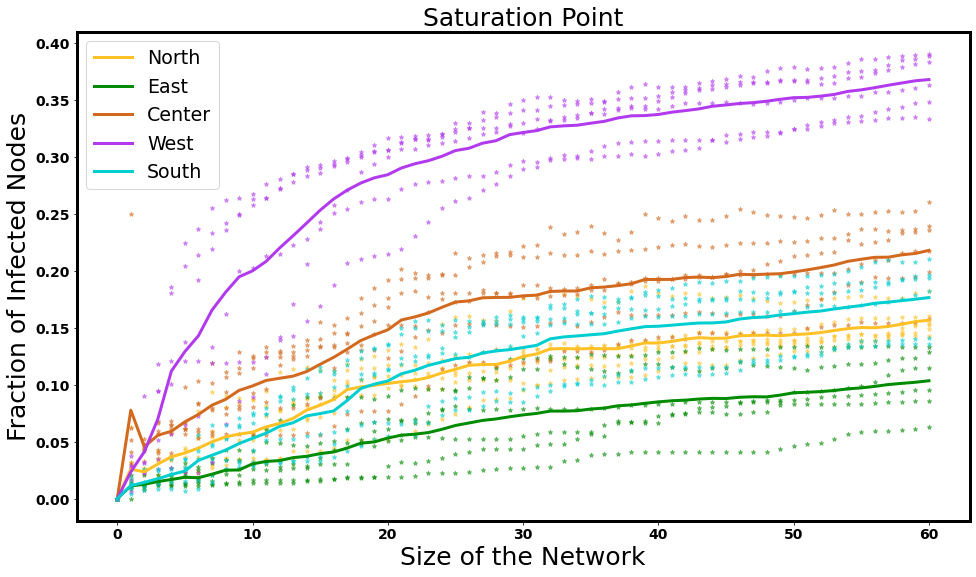

In [59]:
#plot
#scatter plot

fig, ax = plt.subplots(1,1,figsize=(16,9))

for i in range(1,7):
    ax=north_saturation_dif_part_dataset.plot.scatter(ax=ax,x='days', y=f"vals_{i}",c='#FFC125', marker='*',alpha=0.5)

plt.plot(north_saturation_dif_part_dataset['days'], mean_val_north,c='#FFC125',label='North',linewidth=3.0)


for i in range(1,7):
    ax=east_saturation_dif_part_dataset.plot.scatter(ax=ax,x='days', y=f"vals_{i}",c='#008B00', marker='*',alpha=0.5)

plt.plot(east_saturation_dif_part_dataset['days'], mean_val_east,c='#008B00',label='East',linewidth=3.0)


for i in range(1,7):
    ax=center_saturation_dif_part_dataset.plot.scatter(ax=ax,x='days', y=f"vals_{i}",c='#D2691E', marker='*',alpha=0.5)

plt.plot(center_saturation_dif_part_dataset['days'], mean_val_center,c='#D2691E',label='Center',linewidth=3.0)

for i in range(1,7):
    ax=west_saturation_dif_part_dataset.plot.scatter(ax=ax,x='days', y=f"vals_{i}",c='#B23AEE', marker='*',alpha=0.5)

plt.plot(west_saturation_dif_part_dataset['days'], mean_val_west,c='#B23AEE',label='West',linewidth=3.0)

for i in range(1,7):
    ax=south_saturation_dif_part_dataset.plot.scatter(ax=ax,x='days', y=f"vals_{i}",c='#00CED1', marker='*',alpha=0.5)

plt.plot(south_saturation_dif_part_dataset['days'], mean_val_south,c='#00CED1',label='South',linewidth=3.0)


fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Size of the Network',fontsize=25)
plt.ylabel('Fraction of Infected Nodes',fontsize=25)
plt.title('Saturation Point',fontsize=25)
plt.legend(fontsize=19)
plt.savefig('avg_saturation_dif_parts_60_days_2013.pdf')



In [132]:
#make a good function to get all map at once
import geopandas as gpd
import pandas as pd

#distribution function
def dist_dataframe(list_t):
    T_1SU=np.unique(list_t)
    dist=pd.DataFrame(columns=['NM_MUNICIP','number_of_premises'])# I use 'NM_MUNICIP' for column name to be similar to the column in MG geo data fram(dc)
    for x in T_1SU:
        C=list_t.count(x)
        dist=dist.append([{'NM_MUNICIP':x, 'number_of_premises':C}], ignore_index =True)
    return dist

#run a loop to make all maps
for d in range(2,63):#for 100 days. it is 102 because th range in going to 101 and the graph is making <101
    G=network_part_time(df,d)
    initial_infecteds_west=[node for node,info in G.nodes(data=True) if info['region']=='South']
    region_risk_of_west, Infected_node_list_initial_west=SI_region_risk(G,initial_infecteds_west)
    
    

    dc=gpd.read_file('31MUE250GC_SIR.shp')

#alocate to each node(place) a city_name

    city_code_name=list(dc[['NM_MUNICIP','CD_GEOCMU']].values)
    for node in list(G.nodes):
        for i in range(len(city_code_name)):
            if G.nodes[node]['c_code']==int(city_code_name[i][1]):
                G.nodes[node]['c_name']=city_code_name[i][0]

            
#count how many premises are in each city
    city_names_of_nodes=nx.get_node_attributes(G,'c_name')
    city_names_of_nodes_list=list(city_names_of_nodes.values()) #based on our selection of a part of datasets. it is possible that 
                                                            #a city does not had any nodes for that part af data. for example for
                                                            #one month 16 cities does not have any node and so their name is not in city_name_count
                                                            #so dc['number_of_premises'] will have 16 nan(none) element


#count number of node in each city in network
    city_name_count=dist_dataframe(city_names_of_nodes_list)

#add the number of premises in each city as a column to the geopandas data of cities geographical information
    dc.insert(3, 'number_of_premises', None)
    for i in range(len(dc)):
        for j in range(len(city_name_count)):
            if city_name_count.loc[j,'NM_MUNICIP']==dc.loc[i,'NM_MUNICIP']:
                dc.loc[i,'number_of_premises']=city_name_count.loc[j,'number_of_premises']

#count how mmany percent of number of premises in each city is infected in each step.

 #first assumption: when the first node in a city is infected we assume that city as infected and color it.
    
 #allocate zero value as infection step to cities of initial infected nodes. it will be needed for plot a targeted coloring map
    in_city_in_step=dc.copy()
    in_city_in_step['infection_step']=None
    for node in initial_infecteds_west:
        c_name=G.nodes[node]['c_name']
        i=in_city_in_step[in_city_in_step['NM_MUNICIP']==c_name].index.values
    #if in_city_in_step.loc[i,'infection_step'] is True: it does not work like this. because python is khar and does not understand
                                                        # this and consider in_city_in_step.loc[i,'infection_step'] as an aaray not an element
                                                        # so you should make an element from it like the thing in following line
        if list(in_city_in_step.loc[i,'infection_step'])[0] is None:
            in_city_in_step.loc[i,'infection_step']=0
            
            
            
    for item in  Infected_node_list_initial_west:
        infection_step=item[0]
        for node in item[1]:
            c_name=G.nodes[node]['c_name']
            i=in_city_in_step[in_city_in_step['NM_MUNICIP']==c_name].index.values
            if list(in_city_in_step.loc[i,'infection_step'])[0] is None:
                in_city_in_step.loc[i,'infection_step']=infection_step

                
                
    none_none=dc.copy()
    none=dc.copy()
    for i in range(853):
        if none_none.loc[i,'number_of_premises'] is not None:
            none=none.drop(none_none.index[i])
            
            
  #plot map          
    fig, ax = plt.subplots(1, 1, figsize=[10,10])

    in_city_in_step.plot(column='infection_step',cmap='autumn', ax=ax, missing_kwds={'color': 'green', "label": "Not Infected"})
    none.plot(color='black', ax=ax,legend=True, label='withhout premises')
    plt.axis('off')
#save figure in a loop with dif name
    plt.savefig('riskmap_pic_video/map_days_risk_INsouth'+str(d-1)+'.png',format="PNG")

<ipython-input-132-69504615c214>:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=[10,10])
<ipython-input-132-69504615c214>:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=[10,10])
<ipython-input-132-69504615c214>:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

<ipython-input-132-69504615c214>:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=[10,10])
<ipython-input-132-69504615c214>:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=[10,10])
<ipython-input-132-69504615c214>:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

<ipython-input-132-69504615c214>:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=[10,10])
<ipython-input-132-69504615c214>:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=[10,10])
<ipython-input-132-69504615c214>:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

In [4]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 962 kB 7.5 MB/s eta 0:00:01     |████████████████▊               | 501 kB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 10.9 MB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 14.7 MB 33.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 35.8 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 354 kB/s  eta 0:00:01
     |████████████████████████████████| 49 kB 2.2 MB/s  eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
  Using cached descartes-1.1.0-py3-none-any.whl (5.8 kB)
Note: you may need to restart the kernel to use updated packages.


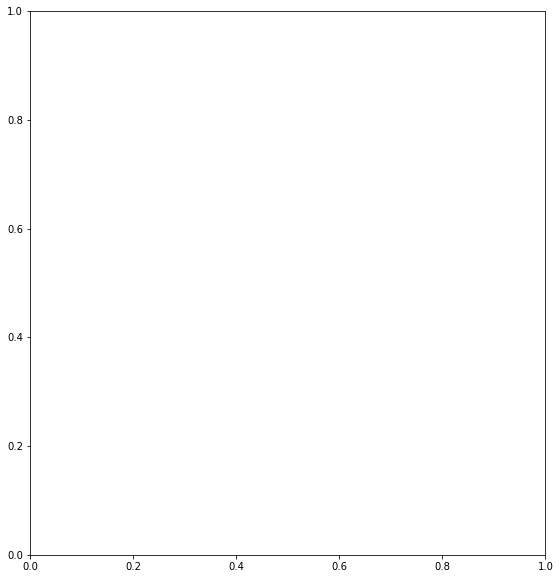

In [8]:
pip install descartes

In [11]:
pip install geoplot

Defaulting to user installation because normal site-packages is not writeable
  Using cached geoplot-0.4.1-py3-none-any.whl (28 kB)
     |████████████████████████████████| 14.4 MB 4.6 MB/s eta 0:00:01
  Using cached mapclassify-2.3.0-py3-none-any.whl (35 kB)
     |████████████████████████████████| 215 kB 38.1 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 61.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 37.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 29.5 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 33.9 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 39 kB/s s eta 0:00:01
     |████████████████████████████████| 300 kB 51.9 MB/s eta 0:00:01
     |████████████████████████████████| 18.1 MB 32.2 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 58.4 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 3.3 MB/s  eta 0:00:01
     |████████████████████████████████| 133 kB 60.6 

  Created wheel for pyshp: filename=pyshp-2.1.0-py3-none-any.whl size=32607 sha256=df86610f53672a19170e11578919daed73c9e3c89ce707a8564bbc59cf558e62
  Stored in directory: /home/sfarokhnejad/.cache/pip/wheels/d7/fe/1d/d891942b39cba76a9545c01088aaa3314d4da25da7e5742669
Successfully built pyshp
Failed to build cartopy
    Running setup.py install for cartopy ... error
    ERROR: Command errored out with exit status 1:
     command: /opt/conda/envs/graphtool/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-m49tqwj2/cartopy/setup.py'"'"'; __file__='"'"'/tmp/pip-install-m49tqwj2/cartopy/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-t2wbo_bn/install-record.txt --single-version-externally-managed --user --prefix= --compile --install-headers /home/sfarokhnejad/.local/include/python3.8/cartopy
    

Note: you may need to restart the kernel to use updated packages.


In [12]:
#run a loop to make all maps
import geopandas as gpd
import pandas as pd

#distribution function
def dist_dataframe(list_t):
    T_1SU=np.unique(list_t)
    dist=pd.DataFrame(columns=['NM_MUNICIP','number_of_premises'])# I use 'NM_MUNICIP' for column name to be similar to the column in MG geo data fram(dc)
    for x in T_1SU:
        C=list_t.count(x)
        dist=dist.append([{'NM_MUNICIP':x, 'number_of_premises':C}], ignore_index =True)
    return dist
for d in range(2,4):#for 100 days. it is 102 because th range in going to 101 and the graph is making <101
    G=network_part_time(df,d)
    initial_infecteds_west=[node for node,info in G.nodes(data=True) if info['region']=='West']
    region_risk_of_west, Infected_node_list_initial_west=SI_region_risk(G,initial_infecteds_west)
    
    

    dc=gpd.read_file('31MUE250GC_SIR.shp')

#alocate to each node(place) a city_name

    city_code_name=list(dc[['NM_MUNICIP','CD_GEOCMU']].values)
    for node in list(G.nodes):
        for i in range(len(city_code_name)):
            if G.nodes[node]['c_code']==int(city_code_name[i][1]):
                G.nodes[node]['c_name']=city_code_name[i][0]

            
#count how many premises are in each city
    city_names_of_nodes=nx.get_node_attributes(G,'c_name')
    city_names_of_nodes_list=list(city_names_of_nodes.values()) #based on our selection of a part of datasets. it is possible that 
                                                            #a city does not had any nodes for that part af data. for example for
                                                            #one month 16 cities does not have any node and so their name is not in city_name_count
                                                            #so dc['number_of_premises'] will have 16 nan(none) element

#
#count number of node in each city in network
    city_name_count=dist_dataframe(city_names_of_nodes_list)

#add the number of premises in each city as a column to the geopandas data of cities geographical information
    dc.insert(3, 'number_of_premises', None)
    for i in range(len(dc)):
        for j in range(len(city_name_count)):
            if city_name_count.loc[j,'NM_MUNICIP']==dc.loc[i,'NM_MUNICIP']:
                dc.loc[i,'number_of_premises']=city_name_count.loc[j,'number_of_premises']

                
    in_city_in_number=dc.copy()
    in_city_in_number['in_number_ratio']=None   

    for node in initial_infecteds_west:
        c_name=G.nodes[node]['c_name']
        i=in_city_in_number[in_city_in_number['NM_MUNICIP']==c_name].index.values
    #if in_city_in_step.loc[i,'infection_step'] is True: it does not work like this. because python is khar and does not understand
                                                        # this and consider in_city_in_step.loc[i,'infection_step'] as an aaray not an element
                                                        # so you should make an element from it like the thing in following line
        if list(in_city_in_number.loc[i,'in_number_ratio'])[0] is None:
            in_city_in_number.loc[i,'in_number_ratio']=in_city_in_number.loc[i,'number_of_premises'] # the cities in the initial infected regions 
        
        
    for item in Infected_node_list_initial_west:
        for node in item[1]:
            c_name=G.nodes[node]['c_name']
            i=in_city_in_number[in_city_in_number['NM_MUNICIP']==c_name].index.values
            if list(in_city_in_number.loc[i,'in_number_ratio'])[0] is None:
                in_city_in_number.loc[i,'in_number_ratio']=1
            else:
                in_city_in_number.loc[i,'in_number_ratio']+=1
            
            
    in_city_in_number['in_number_ratio']=in_city_in_number['in_number_ratio'].fillna(0)
                              
                              
#caclculate the ratio of number of infected nodes to total number of nodes in each city
    in_city_in_number['in_number_ratio']=in_city_in_number['in_number_ratio']/in_city_in_number['number_of_premises']                 
                
               
#!pip install --user geoplot                
#plot

    import geoplot
    import matplotlib.cm as cm
    import matplotlib.colors as mcolors
    fig, ax = plt.subplots(1, 1, figsize=[10,10])

    normalize = mcolors.Normalize(vmin=min(list(in_city_in_number['in_number_ratio'])), vmax=max(list(in_city_in_number['in_number_ratio'])))

    in_city_in_number.plot(column='in_number_ratio', cmap=plt.cm.OrRd, missing_kwds={'color': 'black', "label": "without_premosis"},
                      ax=ax)#'RdYlGn'

# setup the colorbar
    scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=plt.cm.OrRd)
    scalarmappaple.set_array(list(in_city_in_number['in_number_ratio']))

    plt.savefig('riskmap__pic_video/riskmap_INnumber_pic_video/map_ratio_Innumber_risk_INwest'+str(d-1)+'.pdf',format="PDF")
#plt.show()

ModuleNotFoundError: No module named 'geoplot'

In [8]:
conda install -c conda-forge geoplot

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda/envs/graphtool

  added / updated specs:
    - geoplot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    affine-2.3.0               |             py_0          16 KB  conda-forge
    attrs-20.1.0               |     pyh9f0ad1d_0          41 KB  conda-forge
    brotlipy-0.7.0             |py38h1e0a361_1000         346 KB  conda-forge
    c-ares-1.16.1              |       h516909a_3         107 KB  conda-forge
    cartopy-0.18.0             |   py38h172510d_0         1.8 MB  conda-forge
    cffi-1.14.1                |   py38h5bae8af_0         225 KB  conda-forge
    cfitsio-3.470              |       hce51eda_6         1.3 MB  conda-forge
  

affine-2.3.0         | 16 KB     | ##################################### | 100% 
munch-2.5.0          | 12 KB     | ##################################### | 100% 
libpq-12.3           | 2.6 MB    | ##################################### | 100% 
contextily-1.0.0     | 24 KB     | ##################################### | 100% 
poppler-0.87.0       | 12.9 MB   | ##################################### | 100% 
tiledb-1.7.7         | 2.1 MB    | ##################################### | 100% 
cfitsio-3.470        | 1.3 MB    | ##################################### | 100% 
shapely-1.7.1        | 443 KB    | ##################################### | 100% 
seaborn-base-0.10.1  | 158 KB    | ##################################### | 100% 
cligj-0.5.0          | 8 KB      | ##################################### | 100% 
geopandas-0.8.1      | 925 KB    | ##################################### | 100% 
click-plugins-1.1.1  | 9 KB      | ##################################### | 100% 
attrs-20.1.0         | 41 KB

# find region risk for network with uncertainty

In [10]:
def average_risk_region_all(infection_step, region_risk_of_north,region_risk_of_east,region_risk_of_center,\
                            region_risk_of_west,region_risk_of_south):
    #d number of days that we build network from dataset of those days/ network size
    all_initial_infected_risk=[]
    all_initial_infected_risk.append(['North',region_risk_of_north])
    all_initial_infected_risk.append(['East',region_risk_of_east])
    all_initial_infected_risk.append(['Center',region_risk_of_center])
    all_initial_infected_risk.append(['West',region_risk_of_west])
    all_initial_infected_risk.append(['South',region_risk_of_south])
    north_risk_allIn=pd.DataFrame(list(range(0,infection_step+1)), columns=['step'])
    east_risk_allIn=pd.DataFrame(list(range(0,infection_step+1)), columns=['step'])
    center_risk_allIn=pd.DataFrame(list(range(0,infection_step+1)), columns=['step'])
    west_risk_allIn=pd.DataFrame(list(range(0,infection_step+1)), columns=['step'])
    south_risk_allIn=pd.DataFrame(list(range(0,infection_step+1)), columns=['step'])

    
    for risk_list in all_initial_infected_risk:
    
        if risk_list[0]=='North':
             for item in risk_list[1]:
            
                if item[0]=='E':
                    east_list=[]
                    for item_tuple in item[1]:
                        east_list.append(item_tuple[1])
                    east_risk_allIn.insert(1, 'vals_1', east_list)
                
                if item[0]=='C':
                    center_list=[]
                    for item_tuple in item[1]:
                        center_list.append(item_tuple[1])
                    center_risk_allIn.insert(1, 'vals_1', center_list)

                if item[0]=='W':
                    west_list=[]
                    for item_tuple in item[1]:
                        west_list.append(item_tuple[1])
                    west_risk_allIn.insert(1, 'vals_1', west_list)

                if item[0]=='S':
                    south_list=[]
                    for item_tuple in item[1]:
                        south_list.append(item_tuple[1])
                    south_risk_allIn.insert(1, 'vals_1', south_list)

                
        if risk_list[0]=='East':
            for item in risk_list[1]:
                
                if item[0]=='N':
                    north_list=[]
                    for item_tuple in item[1]:
                        north_list.append(item_tuple[1])
                    north_risk_allIn.insert(1, 'vals_1', north_list)
                 
                if item[0]=='C':
                    center_list=[]
                    for item_tuple in item[1]:
                        center_list.append(item_tuple[1])
                    center_risk_allIn.insert(2, 'vals_2', center_list)

                if item[0]=='W':
                    west_list=[]
                    for item_tuple in item[1]:
                        west_list.append(item_tuple[1])
                    west_risk_allIn.insert(2, 'vals_2', west_list)

                if item[0]=='S':
                    south_list=[]
                    for item_tuple in item[1]:
                        south_list.append(item_tuple[1])
                    south_risk_allIn.insert(2, 'vals_2', south_list)

                    
                    
        if risk_list[0]=='Center':
            for item in risk_list[1]:
                if item[0]=='N':
                    north_list=[]
                    for item_tuple in item[1]:
                        north_list.append(item_tuple[1])
                    north_risk_allIn.insert(2, 'vals_2', north_list)

                if item[0]=='E':
                    east_list=[]
                    for item_tuple in item[1]:
                        east_list.append(item_tuple[1])
                    east_risk_allIn.insert(2, 'vals_2', east_list)

                if item[0]=='W':
                    west_list=[]
                    for item_tuple in item[1]:
                        west_list.append(item_tuple[1])
                    west_risk_allIn.insert(3, 'vals_3', west_list)
                   
                if item[0]=='S':
                    south_list=[]
                    for item_tuple in item[1]:
                        south_list.append(item_tuple[1])
                    south_risk_allIn.insert(3, 'vals_3', south_list)
      
                    
                    
        if risk_list[0]=='West':
            for item in risk_list[1]:
                if item[0]=='N':
                    north_list=[]
                    for item_tuple in item[1]:
                        north_list.append(item_tuple[1])
                    north_risk_allIn.insert(3, 'vals_3', north_list)
                   
                if item[0]=='E':
                    east_list=[]
                    for item_tuple in item[1]:
                        east_list.append(item_tuple[1])
                    east_risk_allIn.insert(3, 'vals_3', east_list)

                if item[0]=='C':
                    center_list=[]
                    for item_tuple in item[1]:
                        center_list.append(item_tuple[1])
                    center_risk_allIn.insert(3, 'vals_3', center_list)

                if item[0]=='S':
                    south_list=[]
                    for item_tuple in item[1]:
                        south_list.append(item_tuple[1])
                    south_risk_allIn.insert(4, 'vals_4', south_list)

                    
        if risk_list[0]=='South':
            for item in risk_list[1]:
                if item[0]=='N':
                    north_list=[]
                    for item_tuple in item[1]:
                        north_list.append(item_tuple[1])
                    north_risk_allIn.insert(4, 'vals_4', north_list)
                    
                if item[0]=='E':
                    east_list=[]
                    for item_tuple in item[1]:
                        east_list.append(item_tuple[1])
                    east_risk_allIn.insert(4, 'vals_4', east_list)

                if item[0]=='C':
                    center_list=[]
                    for item_tuple in item[1]:
                        center_list.append(item_tuple[1])
                    center_risk_allIn.insert(4, 'vals_4', center_list)

                if item[0]=='W':
                    west_list=[]
                    for item_tuple in item[1]:
                        west_list.append(item_tuple[1])
                    west_risk_allIn.insert(4, 'vals_4', west_list)
                    
                    
#getting average
#North
    north_risk_allIn= north_risk_allIn.set_index('step')
    mean_val_north = north_risk_allIn.iloc[:,0:].mean(axis=1)
    std_val_north=north_risk_allIn.iloc[:,0:].std(axis=1)
    min_val_north = mean_val_north - 2*std_val_north
    max_val_north = mean_val_north + 2*std_val_north
    north_risk_allIn.reset_index(inplace = True)
#East
    east_risk_allIn= east_risk_allIn.set_index('step')
    mean_val_east = east_risk_allIn.iloc[:,0:].mean(axis=1)
    std_val_east=east_risk_allIn.iloc[:,0:].std(axis=1)
    min_val_east = mean_val_east - 2*std_val_east
    max_val_east = mean_val_east + 2*std_val_east
    east_risk_allIn.reset_index(inplace = True)
#Center
    center_risk_allIn= center_risk_allIn.set_index('step')
    mean_val_center = center_risk_allIn.iloc[:,0:].mean(axis=1)
    std_val_center=center_risk_allIn.iloc[:,0:].std(axis=1)
    min_val_center = mean_val_center - 2*std_val_center
    max_val_center= mean_val_center + 2*std_val_center
    center_risk_allIn.reset_index(inplace = True)
#West
    west_risk_allIn= west_risk_allIn.set_index('step')
    mean_val_west = west_risk_allIn.iloc[:,0:].mean(axis=1)
    std_val_west=west_risk_allIn.iloc[:,0:].std(axis=1)
    min_val_west = mean_val_west - 2*std_val_west
    max_val_west= mean_val_west + 2*std_val_west
    west_risk_allIn.reset_index(inplace = True)
#South
    south_risk_allIn= south_risk_allIn.set_index('step')
    mean_val_south = south_risk_allIn.iloc[:,0:].mean(axis=1)
    std_val_south=south_risk_allIn.iloc[:,0:].std(axis=1)
    min_val_south = mean_val_south - 2*std_val_south
    max_val_south= mean_val_south+ 2*std_val_south
    south_risk_allIn.reset_index(inplace = True)
    
    return north_risk_allIn, east_risk_allIn, center_risk_allIn, west_risk_allIn, south_risk_allIn, mean_val_north,\
           mean_val_east, mean_val_center, mean_val_west, mean_val_south

def SI_region_risk_missnode(Graph,G_original,initial_infecteds):
    initial_nodes=list(G_original.nodes())
    G=copy.deepcopy(Graph)
    beta=0.001#0.00134228   #0.001121#0.002242           # weight_un=#0.00095969#0.00191938 #0.00136986# previous: 0.0027397
    infected = initial_infecteds.copy()
    N=len(initial_nodes)
    i=201 #number of steps of iteration
    susceptible = list(G.nodes())
    
    for infected_node in infected:
        if infected_node in susceptible: 
            susceptible.remove(infected_node)
    initial_infected_Initial_node_set=[]
    for n in infected:
        if n in initial_nodes:
            initial_infected_Initial_node_set.append(n)
    num_j=[]
    num_j.append([0,float(len(initial_infected_Initial_node_set)/N)])
    infected_node_list=[] #save the onfected node in each step for ploting the coloring map

     #find risk related to regions
    center_risk=[(0,0)]; south_risk=[(0,0)];north_risk=[(0,0)];west_risk=[(0,0)];east_risk=[(0,0)]
    In_center=0;In_north=0;In_west=0;In_east=0;In_south=0
    center_list_node=[node for node,info in G_original.nodes(data=True) if info['region']=='Center']
    north_list_node=[node for node,info in G_original.nodes(data=True) if info['region']=='North']
    south_list_node=[node for node,info in G_original.nodes(data=True) if info['region']=='South']
    east_list_node=[node for node,info in G_original.nodes(data=True) if info['region']=='East']
    west_list_node=[node for node,info in G_original.nodes(data=True) if info['region']=='West']      
    region_risks_all=[] #final list to be returned from function
    
    j=1
    while j<i:
        infected_1 = list()
        in_original_step=list()
        #Realizar la infección
        for node in infected: 
            if len(set(G.neighbors(node)))>0:
                '''strategy here is that every time the first chance is get to the highest weight of edges in node neighbors. 
                if rhe neighbor with highest weight does not infect then the second chance is based on random sample choice'''
                edges = list(G.edges(node, data=True))
                if len(edges)==1:
                    neigh=edges[0][1]
                    #neigh=set(G.neighbors(node))
                    if  neigh not in list(infected):
                        if  neigh not in list(infected_1):
                            if random.random()<beta*G[node][neigh]['weight']:
                                infected_1.append(neigh)
                # if len(edges) > 0: #some nodes have zero edges going into it #this one could be useful in directed network
                else:
                    for nbr in set(G.neighbors(node)):
                        if nbr not in list(infected):
                            if  nbr not in list(infected_1):
                                if random.random()<beta*G[node][nbr]['weight']:
                                    infected_1.append(nbr)
        
        
        #Remover a los infectados de los susceptibles:
        infected += infected_1
        for infected_node in infected_1:
            if infected_node in susceptible: 
                susceptible.remove(infected_node)
            if infected_node in initial_nodes:
                in_original_step.append(infected_node)
                
        infected_node_list.append((j, in_original_step))
        for node in in_original_step:
            if node in center_list_node:
                In_center+=1
            if node in north_list_node:
                In_north+=1
            if node in south_list_node:
                In_south+=1
            if node in east_list_node:
                In_east+=1
            if node in west_list_node:
                In_west+=1
        center_risk.append((j,float(In_center/len(center_list_node))))
        north_risk.append((j,float(In_north/len(north_list_node))))
        east_risk.append((j,float(In_east/len(east_list_node))))
        south_risk.append((j,float(In_south/len(south_list_node))))
        west_risk.append((j,float(In_west/len(west_list_node))))
       

        num_j.append([j,float(len(infected)/N)])
        
        #Actualizar el tiempo
        j +=1
    
    region_risks_all.append(('N',north_risk))
    region_risks_all.append(('E',east_risk))
    region_risks_all.append(('C',center_risk))
    region_risks_all.append(('W',west_risk))
    region_risks_all.append(('S',south_risk))
                            
    return region_risks_all,infected_node_list

def add_just_missing_link_comunity(a,list_n,Graph):
    list_weights=[]
    for (u,v) in Graph.edges():
        list_weights.append(Graph.adj[u][v]['weight'])
    G_o=copy.deepcopy(Graph)
    G1=copy.deepcopy(Graph)
    n_edge_region=0
    for n in list_n:
        for n1 in list_n:
            n_edge_region=G_o.number_of_edges(n,n1)+ n_edge_region
    N_missing_link=int((a*0.01)*n_edge_region)
    i=0
    while i<N_missing_link:
        node_tuple=random.sample(list_n, 2)#I used random.sample instead of random.choice
                                            #because randome.sample do not allow repitition so it avoid self loop here
                                             
        if (node_tuple[0],node_tuple[1]) not in G1.edges():
           #first find the mean of weights of edges this node have
           #be careful if you first add new edge you will get erros in calculating mean of weight of edges
            list_neigh=list(G_o.edges(node_tuple[0],data=True))#make a list of weights of the edges incident to this node in the original network without missing link
            list_w=[item[2]['weight'] for item in list_neigh]
            G1.add_edge(node_tuple[0],node_tuple[1])
            #If node in original network do not have any edges and it is isolated the weight of missing link should choosed from weight distribution
            if len(list_neigh)==0:
                G1[node_tuple[0]][node_tuple[1]]['weight']=list(random.sample(list_weights, 1))[0]
            #if node has neighbors we choose weight for missing link based on weights of other edges of node
            else:
                G1.adj[node_tuple[0]][node_tuple[1]]['weight']=list(random.sample(list_w, 1))[0]
     
                
            # this one should be select based on the distribution for the weight of the network was used
            i+=1
        
    return G1

#add missing link
def add_just_missing_link_entire(Graph,a):
    #if you want to run many times this n the same network/ adding uncertainty to a same network just delete this
    list_weights=[]
    for (u,v) in Graph.edges():
        list_weights.append(Graph.adj[u][v]['weight'])
    G_o=copy.deepcopy(Graph)
    G1=copy.deepcopy(Graph)
    N_missing_link=int((a*0.01)*G1.number_of_edges())
    i=0
    while i<N_missing_link:
        node_tuple=random.sample(list(G1.nodes()), 2)

        if (node_tuple[0],node_tuple[1]) not in G1.edges():
            #first find the mean of weights of edges this node have
           #be careful if you first add new edge you will get erros in calculating mean of weight of edges
            list_neigh=list(G_o.edges(node_tuple[0],data=True))#make a list of weights of the edges incident to this node in the original network without missing link
            list_w=[item[2]['weight'] for item in list_neigh]
            G1.add_edge(node_tuple[0],node_tuple[1])
            #If node in original network do not have any edges and it is isolated
            if len(list_neigh)==0:
                G1[node_tuple[0]][node_tuple[1]]['weight']=list(random.sample(list_weights, 1))[0]
            #if node has neighbors we choose weight for missing link based on weights of other edges of node
            else:
                G1.adj[node_tuple[0]][node_tuple[1]]['weight']=list(random.sample(list_w, 1))[0]
                
        
            # this one should be select based on the distribution for the weight of the network was used
            i+=1
        
    return G1

def make_node_region_list(Graph,region):
    G=copy.deepcopy(Graph)
    region=str(region)
    list_node_region=[node for node,info in G.nodes(data=True) if info['region']==region]
    return list_node_region


def add_uncertainty_node_entire_network_assign_reion(a,graph): #most complete function for add miss nodes
    #a=persenctage of number of nodes, degree verfy number of nodes
                                                         # that the added missing nodes will connect to them
    degree=2
    G_original=graph.copy() 
    North_node=make_node_region_list(G_original,'North')
    East_node=make_node_region_list(G_original,'East')
    Center_node=make_node_region_list(G_original,'Center')
    West_node=make_node_region_list(G_original,'West')
    South_node=make_node_region_list(G_original,'South')
    G=copy.deepcopy(graph)
    N_missing_nodes=int((a*0.01)*G_original.number_of_nodes())
    list_missing_node=[]
    
    list_node_original=list(G_original.nodes())
    for j in range(N_missing_nodes):
        m=0 #counter for number of nodes new node in connecting to them. max=5. it should break if m=5
        node_name='Miss'+str(j)
        list_missing_node.append(node_name)
        G.add_node(node_name)
        #'''
        #Ronaldo said it is not a good idea to shuffle
        #random shuffle does not return any list. random shuffle changes the order of nodes in the original list 
        #random.shuffle(list_original_node)'''
        list_node_connection=[]
        first_node=list(random.sample(list_node_original, 1))[0]
        list_node_connection.append(first_node)
        region_node=G_original.nodes[first_node]['region'] 
        G.nodes[node_name]['region']=region_node
        
        if region_node=='North':
           
            p_random=np.random.choice([1,2,3,4,5] ,1, p=[0.8704, 0.0187, 0.0332, 0.0327, 0.0450])
            #the sum of the p should be equal to 1
            #I brought the dominant region first to save time for run
            if p_random[0]==1:
                second_node=list(random.sample( North_node, 1))[0]
            elif p_random[0]==5:
                second_node=list(random.sample( South_node, 1))[0]
            elif p_random[0]==3:
                second_node=list(random.sample( Center_node, 1))[0]
            elif p_random[0]==4:
                second_node=list(random.sample( West_node, 1))[0]
            else:
                second_node=list(random.sample(East_node, 1))[0]

                
        elif  region_node=='East':
            p_random=np.random.choice([1,2,3,4,5] ,1, p=[0.0144, 0.7157, 0.0617, 0.174, 0.0342])
            if p_random[0]==2:
                second_node=list(random.sample(East_node, 1))[0]
            elif p_random[0]==4:
                second_node=list(random.sample( West_node, 1))[0]
            elif p_random[0]==3:
                second_node=list(random.sample( Center_node, 1))[0]
            elif p_random[0]==5:
                second_node=list(random.sample( South_node, 1))[0]
            else:
                second_node=list(random.sample( North_node, 1))[0]
                        
                
                
                
        elif region_node=='Center':
            p_random=np.random.choice([1,2,3,4,5] ,1, p=[0.0172, 0.0319, 0.7438, 0.0711, 0.136])
            
            if p_random[0]==3:
                second_node=list(random.sample(Center_node, 1))[0]
            elif p_random[0]==5:
                second_node=list(random.sample(South_node, 1))[0]
            elif p_random[0]==4:
                second_node=list(random.sample( West_node, 1))[0]
            elif p_random[0]==2:
                second_node=list(random.sample(East_node, 1))[0]
            else: 
                second_node=list(random.sample( North_node, 1))[0]
            
            
            
        elif region_node=='West':
            p_random=np.random.choice([1,2,3,4,5] ,1, p=[0.0035, 0.0365, 0.0211, 0.9226, 0.0163])
            
            if p_random[0]==4:
                second_node=list(random.sample( West_node, 1))[0]
            elif p_random[0]==2:
                second_node=list(random.sample(East_node, 1))[0]
            elif p_random[0]==3:
                second_node=list(random.sample( Center_node, 1))[0]
            elif p_random[0]==5:
                second_node=list(random.sample( South_node, 1))[0]
            else:
                second_node=list(random.sample( North_node, 1))[0]
           
         
                
        else:
            p_random=np.random.choice([1,2,3,4,5] ,1, p=[0.0153, 0.0176, 0.0565, 0.0227, 0.8879])
            if p_random[0]==5:
                second_node=list(random.sample( South_node, 1))[0]
            elif p_random[0]==3:
                second_node=list(random.sample( Center_node, 1))[0]
            elif p_random[0]==4:
                second_node=list(random.sample( West_node, 1))[0]
            elif p_random[0]==2:
                second_node=list(random.sample(East_node, 1))[0]
            else:
                second_node=list(random.sample( North_node, 1))[0]
      
    
        #list_second_node=make_node_region_list(G_original,region_node) #it is better that have the list outside the loop to be executed once
        
        list_node_connection.append(second_node)
        
        #ازونجایی که تو پیدا کردن ریسک مناطق بخشی از میسینگ نود ها که تو اون منطقه هستن اینیشیال اینفکتد هستن. 
        #باید باقی میسینگ نود ها به ضورت راهی برای انتقال بیماری باش پس باید به لینگ ازونا به نود اضلی سیتم باشه و به لینگ از نود اضلی سیستم به اونا 
        #وگرنه سهم مسینگ نود ها در تاثیر روی سیتم فقط همون تعداد محدودی هست که به منطقه اینیشیال اینفکتد اساین شدن و تغییر زیادی در اپیدمی و ریسک نسبت به نت ورک اصلی نمیفته
    
        #first_node
        dict_neigh=dict(G_original.pred[list_node_connection[0]])#make a list of weights of the edges into to this node in the original network without missing link
        list_w=list(dict_neigh.values())
        list_w=[W['weight'] for W in list_w]
        G.add_edge(node_name,list_node_connection[0])
                #If node in original network do not have any edges and it is isolated the weight of missing link should choosed from weight distribution
        if len(list_w)==0: #if the node is just a source and it does not have in-edge
            G[node_name][list_node_connection[0]]['weight']=list(random.sample(list_weights, 1))[0]
                #if node has neighbors we choose weight for missing link based on weights of other edges of node
        else:
            G.adj[node_name][list_node_connection[0]]['weight']=statistics.mean(list_w)
            
            
            
       #second_node
        dict_neigh=dict(G_original.pred[list_node_connection[1]])#make a list of weights of the edges into to this node in the original network without missing link
        list_w=list(dict_neigh.values())
        list_w=[W['weight'] for W in list_w]
        G.add_edge(list_node_connection[1],node_name)
                #If node in original network do not have any edges and it is isolated the weight of missing link should choosed from weight distribution
        if len(list_w)==0: #if the node is just a source and it does not have in-edge
            G[list_node_connection[1]][node_name]['weight']=list(random.sample(list_weights, 1))[0]
                #if node has neighbors we choose weight for missing link based on weights of other edges of node
        else:
            G.adj[list_node_connection[1]][node_name]['weight']=statistics.mean(list_w)
    
    
    
    
    
    
                       
        m+=1
            
    return G ,list_missing_node

In [8]:

#read add_just_missing_link from another file

G_31_days=network_part_time(df, 32)
G_31_misslink_30=add_just_missing_link_entire(G_31_days,30)



#Initial infected list
initial_infecteds_west=[node for node,info in G_31_days.nodes(data=True) if info['region']=='West']
initial_infecteds_east=[node for node,info in G_31_days.nodes(data=True) if info['region']=='East']
initial_infecteds_north=[node for node,info in G_31_days.nodes(data=True) if info['region']=='North']
initial_infecteds_center=[node for node,info in G_31_days.nodes(data=True) if info['region']=='Center']
initial_infecteds_south=[node for node,info in G_31_days.nodes(data=True) if info['region']=='South']



In [88]:
#epidemic when one region is initial infected
region_risk_of_north_misslink_30, Infected_node_list_initial_north=SI_region_risk(G_31_misslink_30,initial_infecteds_north)
region_risk_of_east_misslink_30, Infected_node_list_initial_east=SI_region_risk(G_31_misslink_30,initial_infecteds_east)
region_risk_of_center_misslink_30, Infected_node_list_initial_center=SI_region_risk(G_31_misslink_30,initial_infecteds_center)
region_risk_of_west_misslink_30, Infected_node_list_initial_west=SI_region_risk(G_31_misslink_30,initial_infecteds_west)
region_risk_of_south_misslink_30, Infected_node_list_initial_south=SI_region_risk(G_31_misslink_30,initial_infecteds_south)


#make lists of average risk values for network with missing link
north_risk_allIn_misslink_30, east_risk_allIn_misslink_30, center_risk_allIn_misslink_30,west_risk_allIn_misslink_30,\
south_risk_allIn_misslink_30, mean_val_north_misslink_30,mean_val_east_misslink_30,mean_val_center_misslink_30,\
mean_val_west_misslink_30, mean_val_south_misslink_30=\
average_risk_region_all(200,region_risk_of_north_misslink_30,region_risk_of_east_misslink_30,\
region_risk_of_center_misslink_30,region_risk_of_west_misslink_30,region_risk_of_south_misslink_30)


#make lists of average risk values for original network
#epidemic when one region is initial infected
region_risk_of_north_o, n=SI_region_risk(G_31_days,initial_infecteds_north)
region_risk_of_east_o, n=SI_region_risk(G_31_days,initial_infecteds_east)
region_risk_of_center_o, n=SI_region_risk(G_31_days,initial_infecteds_center)
region_risk_of_west_o, n=SI_region_risk(G_31_days,initial_infecteds_west)
region_risk_of_south_o, n=SI_region_risk(G_31_days,initial_infecteds_south)

n_o, e_o, c_o,w_o,s_o, mean_val_north,mean_val_east,mean_val_center,mean_val_west, mean_val_south=\
average_risk_region_all(300,region_risk_of_north_o,region_risk_of_east_o,\
region_risk_of_center_o,region_risk_of_west_o,region_risk_of_south_o)



#initial infected list for missing node ides
initial_infected_missnode_plus_north=list_missnode_30+initial_infecteds_north
initial_infected_missnode_plus_east=list_missnode_30+initial_infecteds_east
initial_infected_missnode_plus_center=list_missnode_30+initial_infecteds_center
initial_infected_missnode_plus_west=list_missnode_30+initial_infecteds_west
initial_infected_missnode_plus_south=list_missnode_30+initial_infecteds_south


#Epidemic for missing nodes
region_risk_of_north_missnode_30, Infected_node_list_initial_north=SI_region_risk_missnode(G_31_missnode_30,initial_infecteds_north)
region_risk_of_east_missnode_30, Infected_node_list_initial_east=SI_region_risk_missnode(G_31_missnode_30,initial_infecteds_east)
region_risk_of_center_missnode_30, Infected_node_list_initial_center=SI_region_risk_missnode(G_31_missnode_30,initial_infecteds_center)
region_risk_of_west_missnode_30, Infected_node_list_initial_west=SI_region_risk_missnode(G_31_missnode_30,initial_infecteds_west)
region_risk_of_south_missnode_30, Infected_node_list_initial_south=SI_region_risk_missnode(G_31_missnode_30,initial_infecteds_south)

infection_step=20
#make lists of average risk values
north_risk_allIn_missnode_30, east_risk_allIn_missnode_30, center_risk_allIn_missnode_30,\
west_risk_allIn_missnode_30, south_risk_allIn_missnode_30, mean_val_north_missnode_30,mean_val_east_missnode_30,\
mean_val_center_missnode_30, mean_val_west_missnode_30, mean_val_south_missnode_30=average_risk_region_all(infection_step,\
region_risk_of_north_missnode_30,region_risk_of_east_missnode_30,region_risk_of_center_missnode_30,\
            region_risk_of_west_missnode_30, region_risk_of_south_missnode_30)

In [130]:
#epidemic when one region is initial infected
region_risk_of_north_misslink_30, Infected_node_list_initial_north=SI_region_risk(G_31_misslink_30,initial_infecteds_north)
region_risk_of_east_misslink_30, Infected_node_list_initial_east=SI_region_risk(G_31_misslink_30,initial_infecteds_east)
region_risk_of_center_misslink_30, Infected_node_list_initial_center=SI_region_risk(G_31_misslink_30,initial_infecteds_center)
region_risk_of_west_misslink_30, Infected_node_list_initial_west=SI_region_risk(G_31_misslink_30,initial_infecteds_west)
region_risk_of_south_misslink_30, Infected_node_list_initial_south=SI_region_risk(G_31_misslink_30,initial_infecteds_south)


#make lists of average risk values for network with missing link
north_risk_allIn_misslink_30, east_risk_allIn_misslink_30, center_risk_allIn_misslink_30,west_risk_allIn_misslink_30,\
south_risk_allIn_misslink_30, mean_val_north_misslink_30,mean_val_east_misslink_30,mean_val_center_misslink_30,\
mean_val_west_misslink_30, mean_val_south_misslink_30=\
average_risk_region_all(200,region_risk_of_north_misslink_30,region_risk_of_east_misslink_30,\
region_risk_of_center_misslink_30,region_risk_of_west_misslink_30,region_risk_of_south_misslink_30)

In [153]:
G_31_missnode_30,list_missnode_30=add_uncertainty_node_entire_network_assign_reion(30,G_31_days)

In [154]:
#initial infected list for missing node ides
initial_infected_missnode_plus_north=[node for node,info in G_31_missnode_30.nodes(data=True) if info['region']=='North']
initial_infected_missnode_plus_east=[node for node,info in G_31_missnode_30.nodes(data=True) if info['region']=='East']
initial_infected_missnode_plus_center=[node for node,info in G_31_missnode_30.nodes(data=True) if info['region']=='Center']
initial_infected_missnode_plus_west=[node for node,info in G_31_missnode_30.nodes(data=True) if info['region']=='West']
initial_infected_missnode_plus_south=[node for node,info in G_31_missnode_30.nodes(data=True) if info['region']=='South']



#Epidemic for missing nodes
region_risk_of_north_missnode_30, Infected_node_list_initial_north=SI_region_risk_missnode(G_31_missnode_30,G_31_days,initial_infected_missnode_plus_north)
region_risk_of_east_missnode_30, Infected_node_list_initial_east=SI_region_risk_missnode(G_31_missnode_30,G_31_days,initial_infected_missnode_plus_east)
region_risk_of_center_missnode_30, Infected_node_list_initial_center=SI_region_risk_missnode(G_31_missnode_30,G_31_days,initial_infected_missnode_plus_center)
region_risk_of_west_missnode_30, Infected_node_list_initial_west=SI_region_risk_missnode(G_31_missnode_30,G_31_days,initial_infected_missnode_plus_west)
region_risk_of_south_missnode_30, Infected_node_list_initial_south=SI_region_risk_missnode(G_31_missnode_30,G_31_days,initial_infected_missnode_plus_south)

infection_step=200
#make lists of average risk values
north_risk_allIn_missnode_30, east_risk_allIn_missnode_30, center_risk_allIn_missnode_30,\
west_risk_allIn_missnode_30, south_risk_allIn_missnode_30, mean_val_north_missnode_30,mean_val_east_missnode_30,\
mean_val_center_missnode_30, mean_val_west_missnode_30, mean_val_south_missnode_30=average_risk_region_all(infection_step,\
region_risk_of_north_missnode_30,region_risk_of_east_missnode_30,region_risk_of_center_missnode_30,\
            region_risk_of_west_missnode_30, region_risk_of_south_missnode_30)

In [11]:
#uncertainty 30 percent missing link located region
list_n=[node for node,info in G_31_days.nodes(data=True) if info['region']=='North']
list_e=[node for node,info in G_31_days.nodes(data=True) if info['region']=='East']
list_c=[node for node,info in G_31_days.nodes(data=True) if info['region']=='Center']
list_w=[node for node,info in G_31_days.nodes(data=True) if info['region']=='West']
list_s=[node for node,info in G_31_days.nodes(data=True) if info['region']=='South']

G_31_misslink_30_n=add_just_missing_link_comunity(30,list_n,G_31_days)
G_31_misslink_30_e=add_just_missing_link_comunity(30,list_e,G_31_days)
G_31_misslink_30_c=add_just_missing_link_comunity(30,list_c,G_31_days)
G_31_misslink_30_w=add_just_missing_link_comunity(30,list_w,G_31_days)
G_31_misslink_30_s=add_just_missing_link_comunity(30,list_s,G_31_days)


#epidemic when one region is initial infected
region_risk_of_north_misslink_30_located_n, Infected_node_list_initial_north=SI_region_risk(G_31_misslink_30_n,initial_infecteds_north)
region_risk_of_east_misslink_30_located_n, Infected_node_list_initial_east=SI_region_risk(G_31_misslink_30_n,initial_infecteds_east)
region_risk_of_center_misslink_30_located_n, Infected_node_list_initial_center=SI_region_risk(G_31_misslink_30_n,initial_infecteds_center)
region_risk_of_west_misslink_30_located_n, Infected_node_list_initial_west=SI_region_risk(G_31_misslink_30_n,initial_infecteds_west)
region_risk_of_south_misslink_30_located_n, Infected_node_list_initial_south=SI_region_risk(G_31_misslink_30_n,initial_infecteds_south)


#make lists of average risk values for network with missing link
north_risk_allIn_misslink_30_located_n, east_risk_allIn_misslink_30_located_n, center_risk_allIn_misslink_30_located_n,west_risk_allIn_misslink_30_located_n,\
south_risk_allIn_misslink_30_located_n, mean_val_north_misslink_30_located_n,mean_val_east_misslink_30_located_n,mean_val_center_misslink_30_located_n,\
mean_val_west_misslink_30_located_n, mean_val_south_misslink_30_located_n=\
average_risk_region_all(200,region_risk_of_north_misslink_30_located_n,region_risk_of_east_misslink_30_located_n,\
region_risk_of_center_misslink_30_located_n,region_risk_of_west_misslink_30_located_n,region_risk_of_south_misslink_30_located_n)


#epidemic when one region is initial infected
region_risk_of_north_misslink_30_located_e, Infected_node_list_initial_north=SI_region_risk(G_31_misslink_30_e,initial_infecteds_north)
region_risk_of_east_misslink_30_located_e, Infected_node_list_initial_east=SI_region_risk(G_31_misslink_30_e,initial_infecteds_east)
region_risk_of_center_misslink_30_located_e, Infected_node_list_initial_center=SI_region_risk(G_31_misslink_30_e,initial_infecteds_center)
region_risk_of_west_misslink_30_located_e, Infected_node_list_initial_west=SI_region_risk(G_31_misslink_30_e,initial_infecteds_west)
region_risk_of_south_misslink_30_located_e, Infected_node_list_initial_south=SI_region_risk(G_31_misslink_30_e,initial_infecteds_south)


#make lists of average risk values for network with missing link
north_risk_allIn_misslink_30_located_e, east_risk_allIn_misslink_30_located_e, center_risk_allIn_misslink_30_located_e,west_risk_allIn_misslink_30_located_e,\
south_risk_allIn_misslink_30_located_e, mean_val_north_misslink_30_located_e,mean_val_east_misslink_30_located_e,mean_val_center_misslink_30_located_e,\
mean_val_west_misslink_30_located_e, mean_val_south_misslink_30_located_e=\
average_risk_region_all(200,region_risk_of_north_misslink_30_located_e,region_risk_of_east_misslink_30_located_e,\
region_risk_of_center_misslink_30_located_e,region_risk_of_west_misslink_30_located_e,region_risk_of_south_misslink_30_located_e)



#epidemic when one region is initial infected
region_risk_of_north_misslink_30_located_c, Infected_node_list_initial_north=SI_region_risk(G_31_misslink_30_c,initial_infecteds_north)
region_risk_of_east_misslink_30_located_c, Infected_node_list_initial_east=SI_region_risk(G_31_misslink_30_c,initial_infecteds_east)
region_risk_of_center_misslink_30_located_c, Infected_node_list_initial_center=SI_region_risk(G_31_misslink_30_c,initial_infecteds_center)
region_risk_of_west_misslink_30_located_c, Infected_node_list_initial_west=SI_region_risk(G_31_misslink_30_c,initial_infecteds_west)
region_risk_of_south_misslink_30_located_c, Infected_node_list_initial_south=SI_region_risk(G_31_misslink_30_c,initial_infecteds_south)


#make lists of average risk values for network with missing link
north_risk_allIn_misslink_30_located_c, east_risk_allIn_misslink_30_located_c, center_risk_allIn_misslink_30_located_c,west_risk_allIn_misslink_30_located_c,\
south_risk_allIn_misslink_30_located_c, mean_val_north_misslink_30_located_c,mean_val_east_misslink_30_located_c,mean_val_center_misslink_30_located_c,\
mean_val_west_misslink_30_located_c, mean_val_south_misslink_30_located_c=\
average_risk_region_all(200,region_risk_of_north_misslink_30_located_c,region_risk_of_east_misslink_30_located_c,\
region_risk_of_center_misslink_30_located_c,region_risk_of_west_misslink_30_located_c,region_risk_of_south_misslink_30_located_c)



#epidemic when one region is initial infected
region_risk_of_north_misslink_30_located_w, Infected_node_list_initial_north=SI_region_risk(G_31_misslink_30_w,initial_infecteds_north)
region_risk_of_east_misslink_30_located_w, Infected_node_list_initial_east=SI_region_risk(G_31_misslink_30_w,initial_infecteds_east)
region_risk_of_center_misslink_30_located_w, Infected_node_list_initial_center=SI_region_risk(G_31_misslink_30_w,initial_infecteds_center)
region_risk_of_west_misslink_30_located_w, Infected_node_list_initial_west=SI_region_risk(G_31_misslink_30_w,initial_infecteds_west)
region_risk_of_south_misslink_30_located_w, Infected_node_list_initial_south=SI_region_risk(G_31_misslink_30_w,initial_infecteds_south)


#make lists of average risk values for network with missing link
north_risk_allIn_misslink_30_located_w, east_risk_allIn_misslink_30_located_w, center_risk_allIn_misslink_30_located_w,west_risk_allIn_misslink_30_located_w,\
south_risk_allIn_misslink_30_located_w, mean_val_north_misslink_30_located_w,mean_val_east_misslink_30_located_w,mean_val_center_misslink_30_located_w,\
mean_val_west_misslink_30_located_w, mean_val_south_misslink_30_located_w=\
average_risk_region_all(200,region_risk_of_north_misslink_30_located_w,region_risk_of_east_misslink_30_located_w,\
region_risk_of_center_misslink_30_located_w,region_risk_of_west_misslink_30_located_w,region_risk_of_south_misslink_30_located_w)



#epidemic when one region is initial infected
region_risk_of_north_misslink_30_located_s, Infected_node_list_initial_north=SI_region_risk(G_31_misslink_30_s,initial_infecteds_north)
region_risk_of_east_misslink_30_located_s, Infected_node_list_initial_east=SI_region_risk(G_31_misslink_30_s,initial_infecteds_east)
region_risk_of_center_misslink_30_located_s, Infected_node_list_initial_center=SI_region_risk(G_31_misslink_30_s,initial_infecteds_center)
region_risk_of_west_misslink_30_located_s, Infected_node_list_initial_west=SI_region_risk(G_31_misslink_30_s,initial_infecteds_west)
region_risk_of_south_misslink_30_located_s, Infected_node_list_initial_south=SI_region_risk(G_31_misslink_30_s,initial_infecteds_south)


#make lists of average risk values for network with missing link
north_risk_allIn_misslink_30_located_s, east_risk_allIn_misslink_30_located_s, center_risk_allIn_misslink_30_located_s,west_risk_allIn_misslink_30_located_s,\
south_risk_allIn_misslink_30_located_s, mean_val_north_misslink_30_located_s,mean_val_east_misslink_30_located_s,mean_val_center_misslink_30_located_s,\
mean_val_west_misslink_30_located_s, mean_val_south_misslink_30_located_s=\
average_risk_region_all(200,region_risk_of_north_misslink_30_located_s,region_risk_of_east_misslink_30_located_s,\
region_risk_of_center_misslink_30_located_s,region_risk_of_west_misslink_30_located_s,region_risk_of_south_misslink_30_located_s)

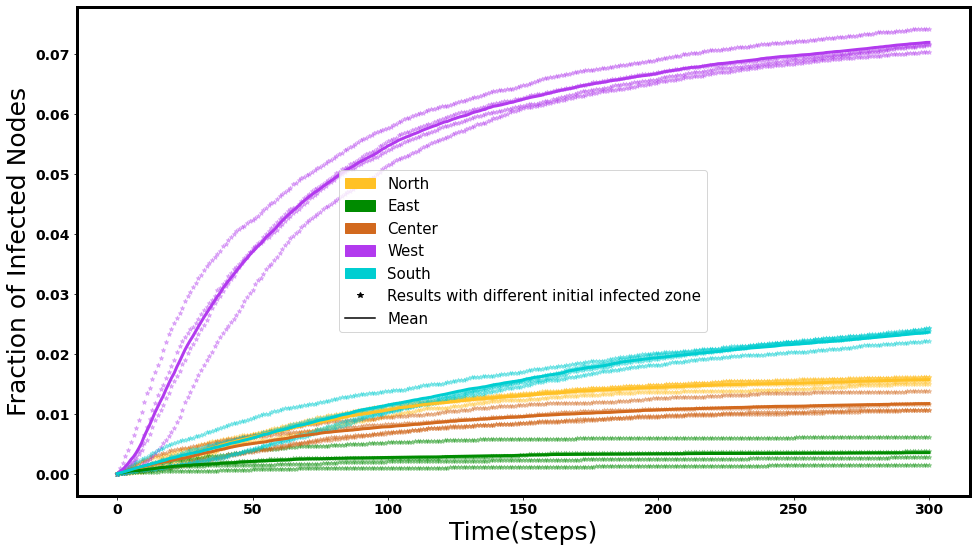

In [91]:
#scatter plot

fig, ax = plt.subplots(1,1,figsize=(16,9))

for i in range(1,5):
    ax=n_o.plot.scatter(ax=ax,x='step', y=f"vals_{i}",c='#FFC125', marker='*',alpha=0.35)

plt.plot(n_o['step'], mean_val_north,c='#FFC125',label='North',linewidth=3.0)


for i in range(1,5):
    ax=e_o.plot.scatter(ax=ax,x='step', y=f"vals_{i}",c='#008B00', marker='*',alpha=0.35)

plt.plot(e_o['step'], mean_val_east,c='#008B00',label='East',linewidth=3.0)


for i in range(1,5):
    ax=c_o.plot.scatter(ax=ax,x='step', y=f"vals_{i}",c='#D2691E', marker='*',alpha=0.35)

plt.plot(c_o['step'], mean_val_center,c='#D2691E',label='Center',linewidth=3.0)

for i in range(1,5):
    ax=w_o.plot.scatter(ax=ax,x='step', y=f"vals_{i}",c='#B23AEE', marker='*',alpha=0.35)

plt.plot(w_o['step'], mean_val_west,c='#B23AEE',label='West',linewidth=3.0)

for i in range(1,5):
    ax=s_o.plot.scatter(ax=ax,x='step', y=f"vals_{i}",c='#00CED1', marker='*',alpha=0.35)

plt.plot(s_o['step'], mean_val_south,c='#00CED1',label='South',linewidth=3.0)


fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Time(steps)',fontsize=25)
plt.ylabel('Fraction of Infected Nodes',fontsize=25)
#plt.title('Avg regions risks',fontsize=25)
c1=mpatches.Patch(color='#FFC125', label='North')
c2=mpatches.Patch(color='#008B00', label='East')
c3=mpatches.Patch(color='#D2691E', label='Center')
c4=mpatches.Patch(color='#B23AEE', label='West')
c5=mpatches.Patch(color='#00CED1', label='South')
c6 = mlines.Line2D([], [], color='black', marker='*',linestyle='', label='Results with different initial infected zone')
c7 = mlines.Line2D([], [], color='black', linestyle='-', label='Mean')
plt.legend(handles=[c1,c2,c3,c4,c5,c6,c7],fontsize=15)
plt.savefig('avg_region_risk_original_1month_SI_0.001_divided_by_totall_nodes.pdf')

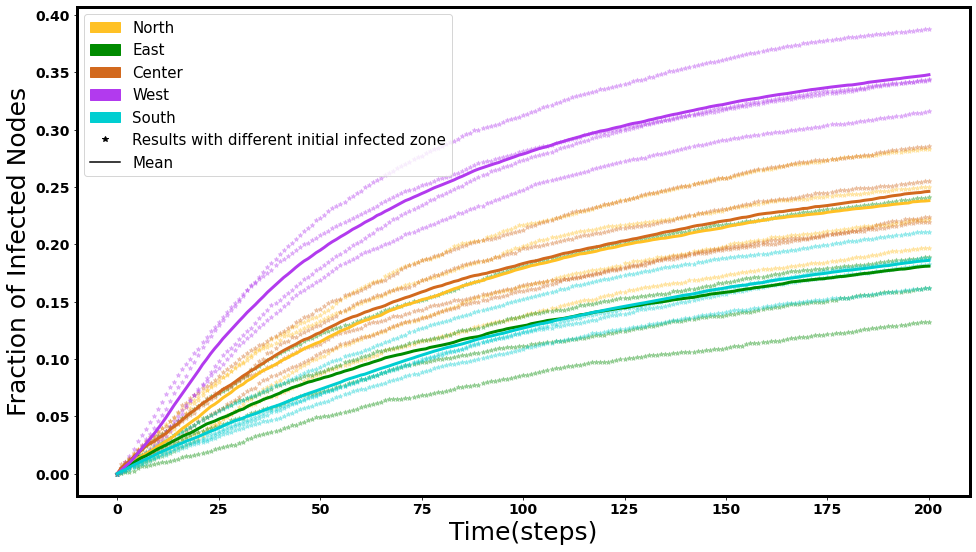

In [131]:
#scatter plot

fig, ax = plt.subplots(1,1,figsize=(16,9))

for i in range(1,5):
    ax=north_risk_allIn_misslink_30.plot.scatter(ax=ax,x='step', y=f"vals_{i}",c='#FFC125', marker='*',alpha=0.3)

plt.plot(north_risk_allIn_misslink_30['step'], mean_val_north_misslink_30,c='#FFC125',label='North(Missing Links)',linewidth=3.0)
#plt.plot(n_o['step'], mean_val_north,c='#FFC125',label='North(Original)',linestyle='--',linewidth=3.0)


for i in range(1,5):
    ax=east_risk_allIn_misslink_30.plot.scatter(ax=ax,x='step', y=f"vals_{i}",c='#008B00', marker='*',alpha=0.3)

plt.plot(east_risk_allIn_misslink_30['step'], mean_val_east_misslink_30,c='#008B00',label='East(Missing Links)',linewidth=3.0)
#plt.plot(e_o['step'], mean_val_east,c='#008B00',label='East(Original)',linestyle='--',linewidth=3.0)


for i in range(1,5):
    ax=center_risk_allIn_misslink_30.plot.scatter(ax=ax,x='step', y=f"vals_{i}",c='#D2691E', marker='*',alpha=0.3)

plt.plot(center_risk_allIn_misslink_30['step'], mean_val_center_misslink_30,c='#D2691E',label='Center(Missing Links)',linewidth=3.0)
#plt.plot(c_o['step'], mean_val_center,c='#D2691E',label='Center(Original)',linestyle='--',linewidth=3.0)

for i in range(1,5):
    ax=west_risk_allIn_misslink_30.plot.scatter(ax=ax,x='step', y=f"vals_{i}",c='#B23AEE', marker='*',alpha=0.3)

plt.plot(west_risk_allIn_misslink_30['step'], mean_val_west_misslink_30,c='#B23AEE',label='West(Missing Links)',linewidth=3.0)
#plt.plot(w_o['step'], mean_val_west,c='#B23AEE',label='West(Original)',linestyle='--',linewidth=3.0)


for i in range(1,5):
    ax=south_risk_allIn_misslink_30.plot.scatter(ax=ax,x='step', y=f"vals_{i}",c='#00CED1', marker='*',alpha=0.3)

plt.plot(south_risk_allIn_misslink_30['step'], mean_val_south_misslink_30,c='#00CED1',label='South(Missing Links)',linewidth=3.0)
#plt.plot(s_o['step'], mean_val_south,c='#00CED1',label='South(Original)',linestyle='--',linewidth=3.0)


fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Time(steps)',fontsize=25)
plt.ylabel('Fraction of Infected Nodes',fontsize=25)
#plt.title('Avg regions risks',fontsize=25)

#make a good legend of colors and line styles
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
c1=mpatches.Patch(color='#FFC125', label='North')
c2=mpatches.Patch(color='#008B00', label='East')
c3=mpatches.Patch(color='#D2691E', label='Center')
c4=mpatches.Patch(color='#B23AEE', label='West')
c5=mpatches.Patch(color='#00CED1', label='South')
c6 = mlines.Line2D([], [], color='black', marker='*',linestyle='', label='Results with different initial infected zone')
c7 = mlines.Line2D([], [], color='black', linestyle='-', label='Mean')
plt.legend(handles=[c1,c2,c3,c4,c5,c6,c7],fontsize=15)
#c6 = mlines.Line2D([], [], color='black', linestyle='--', label='Original Network')
#c7 = mlines.Line2D([], [], color='black', linestyle='-', label='30% Missing Links on Entire Network')
#plt.legend(handles=[c1,c2,c3,c4,c5,c6,c7],fontsize=15)
#plt.title('Risk of the network with 30 % Missing Links in Entire Network',fontsize=25)
plt.savefig('avg_region_risk_31days_misslink30_SI_0.001.pdf')


In [126]:
import pickle
#original
n_o.to_pickle('real_network/risk/risk_network_O_(31days)1month_all_north.pkl')
e_o.to_pickle('real_network/risk/risk_network_O_(31days)1month_all_east.pkl')
c_o.to_pickle('real_network/risk/risk_network_O_(31days)1month_all_center.pkl')
w_o.to_pickle('real_network/risk/risk_network_O_(31days)1month_all_west.pkl')
s_o.to_pickle('real_network/risk/risk_network_O_(31days)1month_all_south.pkl')
#mean
with open ('real_network/risk/risk_network_O_(31days)1month_mean_north', 'wb') as fp:
    pickle.dump(mean_val_north, fp)
with open ('real_network/risk/risk_network_O_(31days)1month_mean_east', 'wb') as fp:
    pickle.dump(mean_val_east, fp)
with open ('real_network/risk/risk_network_O_(31days)1month_mean_center', 'wb') as fp:
    pickle.dump(mean_val_center, fp)
with open ('real_network/risk/risk_network_O_(31days)1month_mean_west', 'wb') as fp:
    pickle.dump(mean_val_west, fp)
with open ('real_network/risk/risk_network_O_(31days)1month_mean_south', 'wb') as fp:
    pickle.dump(mean_val_south, fp)
    #risk missing link network
north_risk_allIn_misslink_30.to_pickle('real_network/risk/risk_network_30%_missing_link_(31days)1month_all_north.pkl')
east_risk_allIn_misslink_30.to_pickle('real_network/risk/risk_network_30%_missing_link_(31days)1month_all_east.pkl')
center_risk_allIn_misslink_30.to_pickle('real_network/risk/risk_network_30%_missing_link_(31days)1month_all_center.pkl')
west_risk_allIn_misslink_30.to_pickle('real_network/risk/risk_network_30%_missing_link_(31days)1month_all_west.pkl')
south_risk_allIn_misslink_30.to_pickle('real_network/risk/risk_network_30%_missing_link_(31days)1month_all_south.pkl')
    
#mean 
with open ('real_network/risk/risk_network_30%_missing_link_(31days)1month_mean_north', 'wb') as fp:
    pickle.dump(mean_val_north_misslink_30, fp)
with open ('real_network/risk/risk_network_30%_missing_link_(31days)1month_mean_east', 'wb') as fp:
    pickle.dump(mean_val_east_misslink_30, fp)
with open ('real_network/risk/risk_network_30%_missing_link_(31days)1month_mean_center', 'wb') as fp:
    pickle.dump(mean_val_center_misslink_30, fp)
with open ('real_network/risk/risk_network_30%_missing_link_(31days)1month_mean_west', 'wb') as fp:
    pickle.dump(mean_val_west_misslink_30, fp)
with open ('real_network/risk/risk_network_30%_missing_link_(31days)1month_mean_south', 'wb') as fp:
    pickle.dump(mean_val_south_misslink_30, fp)
    
#risk missing node network
north_risk_allIn_missnode_30.to_pickle('real_network/risk/risk_network_30%_missing_node_(31days)1month_all_north.pkl')
east_risk_allIn_missnode_30.to_pickle('real_network/risk/risk_network_30%_missing_node_(31days)1month_all_east.pkl')
center_risk_allIn_missnode_30.to_pickle('real_network/risk/risk_network_30%_missing_node_(31days)1month_all_center.pkl')
west_risk_allIn_missnode_30.to_pickle('real_network/risk/risk_network_30%_missing_node_(31days)1month_all_west.pkl')
south_risk_allIn_missnode_30.to_pickle('real_network/risk/risk_network_30%_missing_node_(31days)1month_all_south.pkl')
    
#mean 
with open ('real_network/risk/risk_network_30%_missing_node_(31days)1month_mean_north', 'wb') as fp:
    pickle.dump(mean_val_north_missnode_30, fp)
with open ('real_network/risk/risk_network_30%_missing_node_(31days)1month_mean_east', 'wb') as fp:
    pickle.dump(mean_val_east_missnode_30, fp)
with open ('real_network/risk/risk_network_30%_missing_node_(31days)1month_mean_center', 'wb') as fp:
    pickle.dump(mean_val_center_missnode_30, fp)
with open ('real_network/risk/risk_network_30%_missing_node_(31days)1month_mean_west', 'wb') as fp:
    pickle.dump(mean_val_west_missnode_30, fp)
with open ('real_network/risk/risk_network_30%_missing_node_(31days)1month_mean_south', 'wb') as fp:
    pickle.dump(mean_val_south_missnode_30, fp)



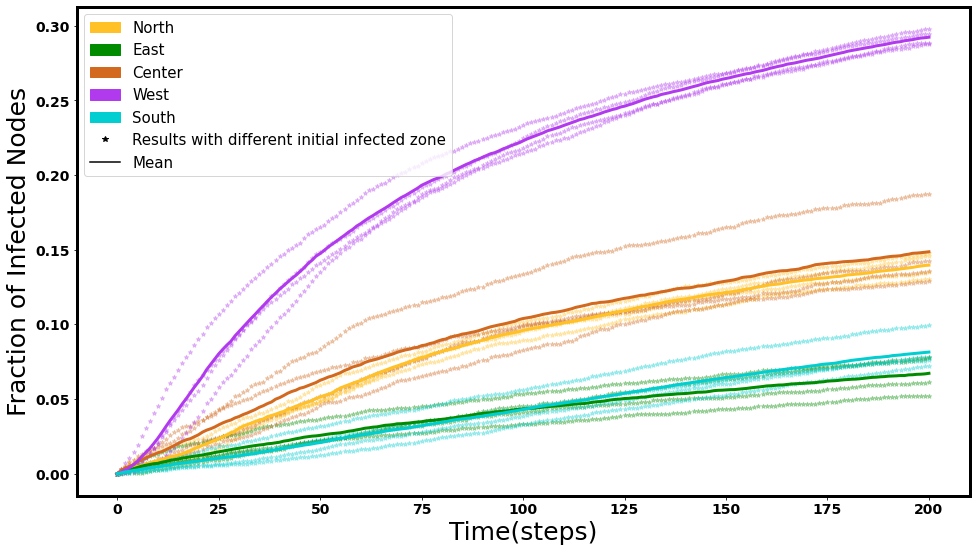

In [156]:
#scatter plot

fig, ax = plt.subplots(1,1,figsize=(16,9))

for i in range(1,5):
    ax=north_risk_allIn_missnode_30.plot.scatter(ax=ax,x='step', y=f"vals_{i}",c='#FFC125', marker='*',alpha=0.3)

plt.plot(north_risk_allIn_missnode_30['step'], mean_val_north_missnode_30,c='#FFC125',label='North(Missing Links)',linewidth=3.0)



for i in range(1,5):
    ax=east_risk_allIn_missnode_30.plot.scatter(ax=ax,x='step', y=f"vals_{i}",c='#008B00', marker='*',alpha=0.3)

plt.plot(east_risk_allIn_missnode_30['step'], mean_val_east_missnode_30,c='#008B00',label='East(Missing Links)',linewidth=3.0)
#plt.plot(e_o['step'], mean_val_east,c='#008B00',label='East(Original)',linestyle='--',linewidth=3.0)


for i in range(1,5):
    ax=center_risk_allIn_missnode_30.plot.scatter(ax=ax,x='step', y=f"vals_{i}",c='#D2691E', marker='*',alpha=0.3)

plt.plot(center_risk_allIn_missnode_30['step'], mean_val_center_missnode_30,c='#D2691E',label='Center(Missing Links)',linewidth=3.0)
#plt.plot(c_o['step'], mean_val_center,c='#D2691E',label='Center(Original)',linestyle='--',linewidth=3.0)

for i in range(1,5):
    ax=west_risk_allIn_missnode_30.plot.scatter(ax=ax,x='step', y=f"vals_{i}",c='#B23AEE', marker='*',alpha=0.3)

plt.plot(west_risk_allIn_missnode_30['step'], mean_val_west_missnode_30,c='#B23AEE',label='West(Missing Links)',linewidth=3.0)
#plt.plot(w_o['step'], mean_val_west,c='#B23AEE',label='West(Original)',linestyle='--',linewidth=3.0)


for i in range(1,5):
    ax=south_risk_allIn_missnode_30.plot.scatter(ax=ax,x='step', y=f"vals_{i}",c='#00CED1', marker='*',alpha=0.3)

plt.plot(south_risk_allIn_missnode_30['step'], mean_val_south_missnode_30,c='#00CED1',label='South(Missing Links)',linewidth=3.0)
#plt.plot(s_o['step'], mean_val_south,c='#00CED1',label='South(Original)',linestyle='--',linewidth=3.0)


fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Time(steps)',fontsize=25)
plt.ylabel('Fraction of Infected Nodes',fontsize=25)
#plt.title('Avg regions risks',fontsize=25)

#make a good legend of colors and line styles
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
c1=mpatches.Patch(color='#FFC125', label='North')
c2=mpatches.Patch(color='#008B00', label='East')
c3=mpatches.Patch(color='#D2691E', label='Center')
c4=mpatches.Patch(color='#B23AEE', label='West')
c5=mpatches.Patch(color='#00CED1', label='South')
c6 = mlines.Line2D([], [], color='black', marker='*',linestyle='', label='Results with different initial infected zone')
c7 = mlines.Line2D([], [], color='black', linestyle='-', label='Mean')
plt.legend(handles=[c1,c2,c3,c4,c5,c6,c7],fontsize=15)
#c6 = mlines.Line2D([], [], color='black', linestyle='--', label='Original Network')
#c7 = mlines.Line2D([], [], color='black', linestyle='-', label='30% Missing Links on Entire Network')
#plt.legend(handles=[c1,c2,c3,c4,c5,c6,c7],fontsize=15)
#plt.title('Risk of the network with 30 % Missing Links in Entire Network',fontsize=25)

plt.savefig('avg_region_risk_31days_missnode30_SI_0.001.pdf')


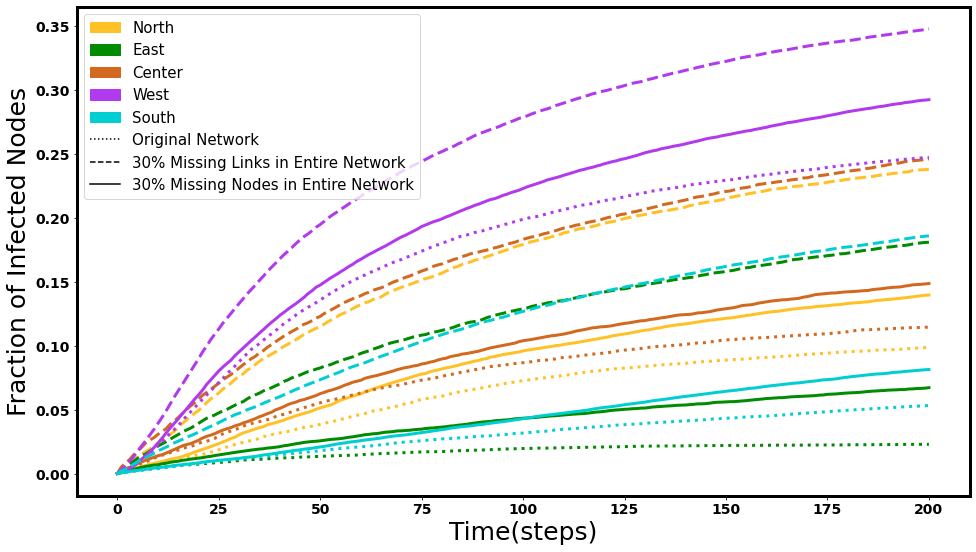

In [157]:
#plot

fig, ax = plt.subplots(1,1,figsize=(16,9))

plt.plot(north_risk_allIn_missnode_30['step'],  mean_val_north_missnode_30,c='#FFC125',label='North(Missing Links)',linewidth=3.0)
plt.plot(north_risk_allIn_misslink_30['step'], mean_val_north_misslink_30,c='#FFC125',label='North(Original)',linestyle='--',linewidth=3.0)
plt.plot(n_o['step'], mean_val_north,c='#FFC125',label='North(Original)',linestyle='dotted',linewidth=3.0)


plt.plot(east_risk_allIn_missnode_30['step'], mean_val_east_missnode_30,c='#008B00',label='East(Missing Links)',linewidth=3.0)
plt.plot(east_risk_allIn_misslink_30['step'], mean_val_east_misslink_30,c='#008B00',linestyle='--',label='East(Missing Links)',linewidth=3.0)
plt.plot(e_o['step'], mean_val_east,c='#008B00',label='East(Original)',linestyle='dotted',linewidth=3.0)


plt.plot(center_risk_allIn_missnode_30['step'], mean_val_center_missnode_30,c='#D2691E',label='Center(Missing Links)',linewidth=3.0)
plt.plot(center_risk_allIn_misslink_30['step'], mean_val_center_misslink_30,c='#D2691E',linestyle='--',label='Center(Missing Links)',linewidth=3.0)
plt.plot(c_o['step'], mean_val_center,c='#D2691E',label='Center(Original)',linestyle='dotted',linewidth=3.0)

plt.plot(west_risk_allIn_missnode_30['step'], mean_val_west_missnode_30,c='#B23AEE',label='West(Missing Links)',linewidth=3.0)
plt.plot(west_risk_allIn_misslink_30['step'], mean_val_west_misslink_30,c='#B23AEE',linestyle='--',label='West(Missing Links)',linewidth=3.0)
plt.plot(w_o['step'], mean_val_west,c='#B23AEE',label='West(Original)',linestyle='dotted',linewidth=3.0)


plt.plot(south_risk_allIn_missnode_30['step'], mean_val_south_missnode_30,c='#00CED1',label='South(Missing Links)',linewidth=3.0)
plt.plot(south_risk_allIn_misslink_30['step'], mean_val_south_misslink_30,c='#00CED1',linestyle='--',label='South(Missing Links)',linewidth=3.0)
plt.plot(s_o['step'], mean_val_south,c='#00CED1',label='South(Original)',linestyle='dotted',linewidth=3.0)


fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Time(steps)',fontsize=25)
plt.ylabel('Fraction of Infected Nodes',fontsize=25)
#plt.title('Avg regions risks',fontsize=25)

#make a good legend of colors and line styles
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
c1=mpatches.Patch(color='#FFC125', label='North')
c2=mpatches.Patch(color='#008B00', label='East')
c3=mpatches.Patch(color='#D2691E', label='Center')
c4=mpatches.Patch(color='#B23AEE', label='West')
c5=mpatches.Patch(color='#00CED1', label='South')
c8 = mlines.Line2D([], [], color='black', linestyle='-', label='30% Missing Nodes in Entire Network')
c6 = mlines.Line2D([], [], color='black', linestyle='dotted', label='Original Network')
c7 = mlines.Line2D([], [], color='black', linestyle='--', label='30% Missing Links in Entire Network')
plt.legend(handles=[c1,c2,c3,c4,c5,c6,c7,c8],fontsize=15)
plt.savefig('avg_region_risk_31days_Original_missnode30_misslink30_SI_0.001.pdf')


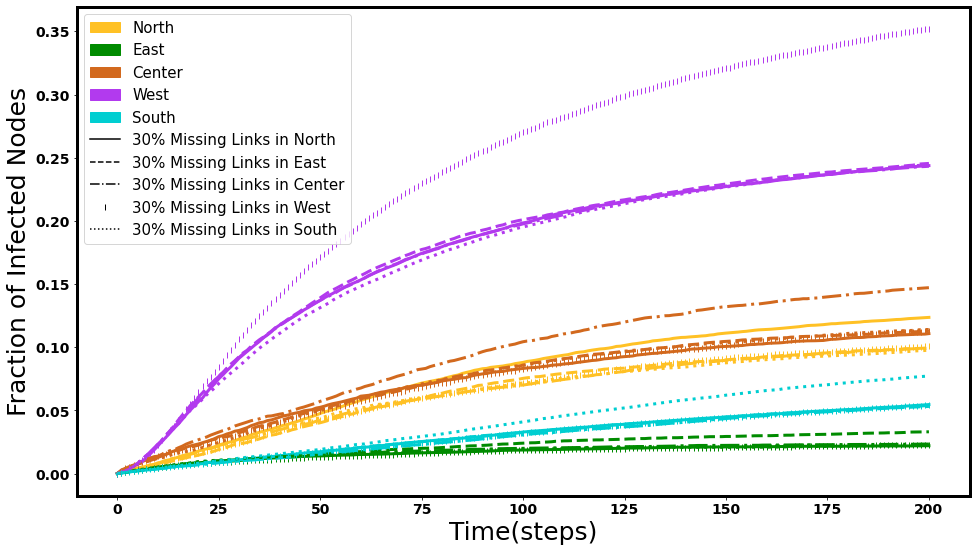

In [19]:
#risk when uncertainty is localized
fig, ax = plt.subplots(1,1,figsize=(16,9))
#located in north
plt.plot(north_risk_allIn_misslink_30_located_n['step'],mean_val_north_misslink_30_located_n,c='#FFC125',linewidth=3.0)
plt.plot(east_risk_allIn_misslink_30_located_n['step'],mean_val_east_misslink_30_located_n,c='#008B00',linewidth=3.0)
plt.plot(center_risk_allIn_misslink_30_located_n['step'],mean_val_center_misslink_30_located_n,c='#D2691E',linewidth=3.0)
plt.plot(west_risk_allIn_misslink_30_located_n['step'],mean_val_west_misslink_30_located_n,c='#B23AEE',linewidth=3.0)
plt.plot(south_risk_allIn_misslink_30_located_n['step'],mean_val_south_misslink_30_located_n,c='#00CED1',linewidth=3.0)

#located in east
plt.plot(north_risk_allIn_misslink_30_located_e['step'],mean_val_north_misslink_30_located_e,linestyle='--',c='#FFC125',linewidth=3.0)
plt.plot(east_risk_allIn_misslink_30_located_e['step'],mean_val_east_misslink_30_located_e,linestyle='--',c='#008B00',linewidth=3.0)
plt.plot(center_risk_allIn_misslink_30_located_e['step'],mean_val_center_misslink_30_located_e,linestyle='--',c='#D2691E',linewidth=3.0)
plt.plot(west_risk_allIn_misslink_30_located_e['step'],mean_val_west_misslink_30_located_e,linestyle='--',c='#B23AEE',linewidth=3.0)
plt.plot(south_risk_allIn_misslink_30_located_e['step'],mean_val_south_misslink_30_located_e,linestyle='--',c='#00CED1',linewidth=3.0)

#located in east
plt.plot(north_risk_allIn_misslink_30_located_c['step'],mean_val_north_misslink_30_located_c,linestyle='dashdot',c='#FFC125',linewidth=3.0)
plt.plot(east_risk_allIn_misslink_30_located_c['step'],mean_val_east_misslink_30_located_c,linestyle='dashdot',c='#008B00',linewidth=3.0)
plt.plot(center_risk_allIn_misslink_30_located_c['step'],mean_val_center_misslink_30_located_c,linestyle='dashdot',c='#D2691E',linewidth=3.0)
plt.plot(west_risk_allIn_misslink_30_located_c['step'],mean_val_west_misslink_30_located_c,linestyle='dashdot',c='#B23AEE',linewidth=3.0)
plt.plot(south_risk_allIn_misslink_30_located_c['step'],mean_val_south_misslink_30_located_c,linestyle='dashdot',c='#00CED1',linewidth=3.0)

#located in west
plt.plot(north_risk_allIn_misslink_30_located_w['step'],mean_val_north_misslink_30_located_w,linestyle='',marker='|',c='#FFC125',linewidth=2.0)
plt.plot(east_risk_allIn_misslink_30_located_w['step'],mean_val_east_misslink_30_located_w,linestyle='',marker='|',c='#008B00',linewidth=2.0)
plt.plot(center_risk_allIn_misslink_30_located_w['step'],mean_val_center_misslink_30_located_w,linestyle='',marker='|',c='#D2691E',linewidth=2.0)
plt.plot(west_risk_allIn_misslink_30_located_w['step'],mean_val_west_misslink_30_located_w,linestyle='',marker='|',c='#B23AEE',linewidth=2.0)
plt.plot(south_risk_allIn_misslink_30_located_w['step'],mean_val_south_misslink_30_located_w,linestyle='',marker='|',c='#00CED1',linewidth=2.0)

#located in south

#located in east
plt.plot(north_risk_allIn_misslink_30_located_s['step'],mean_val_north_misslink_30_located_s,linestyle='dotted',c='#FFC125',linewidth=3.0)
plt.plot(east_risk_allIn_misslink_30_located_s['step'],mean_val_east_misslink_30_located_s,linestyle='dotted',c='#008B00',linewidth=3.0)
plt.plot(center_risk_allIn_misslink_30_located_s['step'],mean_val_center_misslink_30_located_s,linestyle='dotted',c='#D2691E',linewidth=3.0)
plt.plot(west_risk_allIn_misslink_30_located_s['step'],mean_val_west_misslink_30_located_s,linestyle='dotted',c='#B23AEE',linewidth=3.0)
plt.plot(south_risk_allIn_misslink_30_located_s['step'],mean_val_south_misslink_30_located_s,linestyle='dotted',c='#00CED1',linewidth=3.0)


fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Time(steps)',fontsize=25)
plt.ylabel('Fraction of Infected Nodes',fontsize=25)
#plt.title('Avg regions risks',fontsize=25)

#make a good legend of colors and line styles
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
c1=mpatches.Patch(color='#FFC125', label='North')
c2=mpatches.Patch(color='#008B00', label='East')
c3=mpatches.Patch(color='#D2691E', label='Center')
c4=mpatches.Patch(color='#B23AEE', label='West')
c5=mpatches.Patch(color='#00CED1', label='South')
c6 = mlines.Line2D([], [], color='black', linestyle='-', label='30% Missing Links in North')
c7 = mlines.Line2D([], [], color='black', linestyle='--', label='30% Missing Links in East')
c8= mlines.Line2D([], [], color='black', linestyle='dashdot', label='30% Missing Links in Center')
c9 = mlines.Line2D([], [], color='black', linestyle='',marker='|', label='30% Missing Links in West')
c10 = mlines.Line2D([], [], color='black', linestyle='dotted', label='30% Missing Links in South')


plt.legend(handles=[c1,c2,c3,c4,c5,c6,c7,c8,c9,c10],fontsize=15)
plt.savefig('avg_region_risk_31days_misslink30_in_Regions_SI_0.001.pdf')


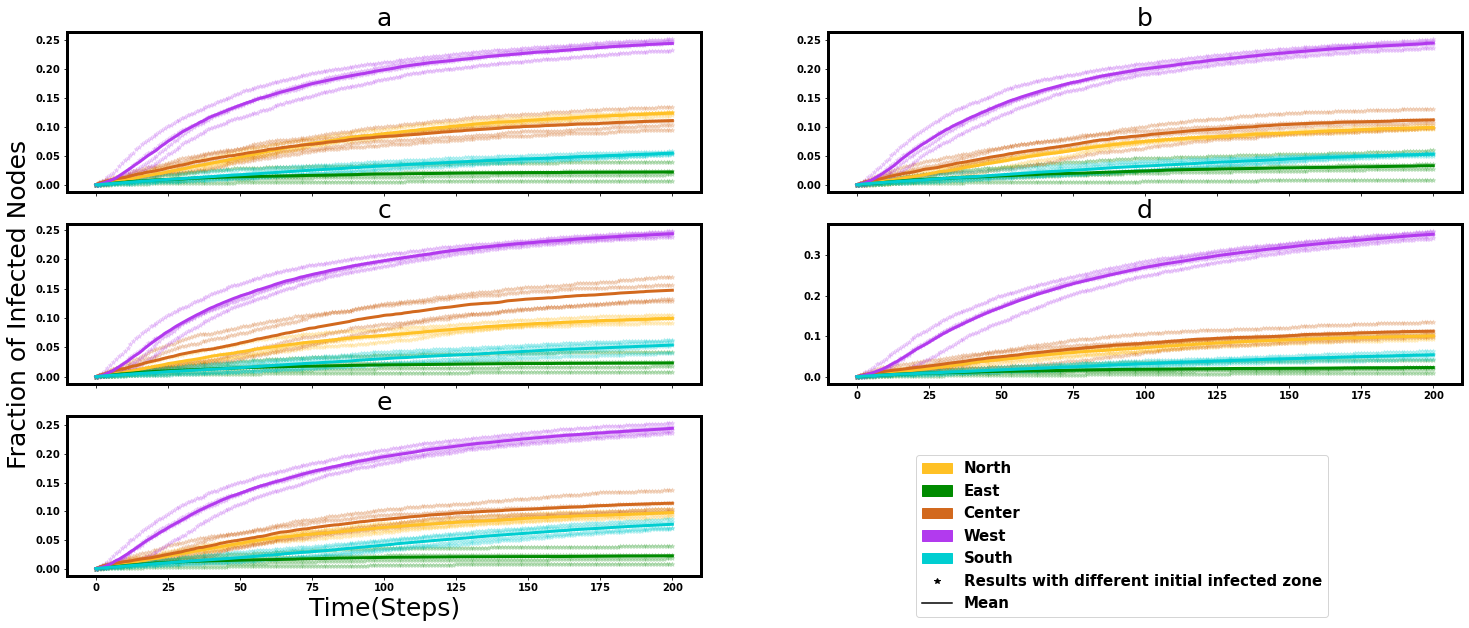

In [77]:
#plot risk of located missing links seperatly with detailes
fig,axs=plt.subplots(3, 2, figsize=[25,10])
fig.delaxes(axs[2,1])

#located in north
for i in range(1,5):
    axs[0,0]=north_risk_allIn_misslink_30_located_n.plot.scatter(ax=axs[0,0],x='step', y=f"vals_{i}",c='#FFC125', marker='*',alpha=0.2)

axs[0,0].plot(north_risk_allIn_misslink_30_located_n['step'], mean_val_north_misslink_30_located_n,c='#FFC125',linewidth=3.0)

for i in range(1,5):
    axs[0,0]=east_risk_allIn_misslink_30_located_n.plot.scatter(ax=axs[0,0],x='step', y=f"vals_{i}",c='#008B00', marker='*',alpha=0.2)

axs[0,0].plot(east_risk_allIn_misslink_30_located_n['step'], mean_val_east_misslink_30_located_n,c='#008B00',linewidth=3.0)

for i in range(1,5):
    axs[0,0]=center_risk_allIn_misslink_30_located_n.plot.scatter(ax=axs[0,0],x='step', y=f"vals_{i}",c='#D2691E', marker='*',alpha=0.2)

axs[0,0].plot(center_risk_allIn_misslink_30_located_n['step'], mean_val_center_misslink_30_located_n,c='#D2691E',linewidth=3.0)

for i in range(1,5):
    axs[0,0]=west_risk_allIn_misslink_30_located_n.plot.scatter(ax=axs[0,0],x='step', y=f"vals_{i}",c='#B23AEE', marker='*',alpha=0.2)

axs[0,0].plot(west_risk_allIn_misslink_30_located_n['step'], mean_val_west_misslink_30_located_n,c='#B23AEE',linewidth=3.0)

for i in range(1,5):
    axs[0,0]=south_risk_allIn_misslink_30_located_n.plot.scatter(ax=axs[0,0],x='step', y=f"vals_{i}",c='#00CED1', marker='*',alpha=0.2)

axs[0,0].plot(south_risk_allIn_misslink_30_located_n['step'], mean_val_south_misslink_30_located_n,c='#00CED1',linewidth=3.0)


#located in east
for i in range(1,5):
    axs[0,1]=north_risk_allIn_misslink_30_located_e.plot.scatter(ax=axs[0,1],x='step', y=f"vals_{i}",c='#FFC125', marker='*',alpha=0.2)

axs[0,1].plot(north_risk_allIn_misslink_30_located_e['step'], mean_val_north_misslink_30_located_e,c='#FFC125',linewidth=3.0)

for i in range(1,5):
    axs[0,1]=east_risk_allIn_misslink_30_located_e.plot.scatter(ax=axs[0,1],x='step', y=f"vals_{i}",c='#008B00', marker='*',alpha=0.2)

axs[0,1].plot(east_risk_allIn_misslink_30_located_e['step'], mean_val_east_misslink_30_located_e,c='#008B00',linewidth=3.0)

for i in range(1,5):
    axs[0,1]=center_risk_allIn_misslink_30_located_e.plot.scatter(ax=axs[0,1],x='step', y=f"vals_{i}",c='#D2691E', marker='*',alpha=0.2)

axs[0,1].plot(center_risk_allIn_misslink_30_located_e['step'], mean_val_center_misslink_30_located_e,c='#D2691E',linewidth=3.0)

for i in range(1,5):
    axs[0,1]=west_risk_allIn_misslink_30_located_e.plot.scatter(ax=axs[0,1],x='step', y=f"vals_{i}",c='#B23AEE', marker='*',alpha=0.2)

axs[0,1].plot(west_risk_allIn_misslink_30_located_e['step'], mean_val_west_misslink_30_located_e,c='#B23AEE',linewidth=3.0)

for i in range(1,5):
    axs[0,1]=south_risk_allIn_misslink_30_located_e.plot.scatter(ax=axs[0,1],x='step', y=f"vals_{i}",c='#00CED1', marker='*',alpha=0.2)

axs[0,1].plot(south_risk_allIn_misslink_30_located_e['step'], mean_val_south_misslink_30_located_e,c='#00CED1',linewidth=3.0)



#located in center
for i in range(1,5):
    axs[1,0]=north_risk_allIn_misslink_30_located_c.plot.scatter(ax=axs[1,0],x='step', y=f"vals_{i}",c='#FFC125', marker='*',alpha=0.2)

axs[1,0].plot(north_risk_allIn_misslink_30_located_c['step'], mean_val_north_misslink_30_located_c,c='#FFC125',linewidth=3.0)

for i in range(1,5):
    axs[1,0]=east_risk_allIn_misslink_30_located_c.plot.scatter(ax=axs[1,0],x='step', y=f"vals_{i}",c='#008B00', marker='*',alpha=0.2)

axs[1,0].plot(east_risk_allIn_misslink_30_located_c['step'], mean_val_east_misslink_30_located_c,c='#008B00',linewidth=3.0)

for i in range(1,5):
    axs[1,0]=center_risk_allIn_misslink_30_located_c.plot.scatter(ax=axs[1,0],x='step', y=f"vals_{i}",c='#D2691E', marker='*',alpha=0.2)

axs[1,0].plot(center_risk_allIn_misslink_30_located_c['step'], mean_val_center_misslink_30_located_c,c='#D2691E',linewidth=3.0)

for i in range(1,5):
    axs[1,0]=west_risk_allIn_misslink_30_located_c.plot.scatter(ax=axs[1,0],x='step', y=f"vals_{i}",c='#B23AEE', marker='*',alpha=0.2)

axs[1,0].plot(west_risk_allIn_misslink_30_located_c['step'], mean_val_west_misslink_30_located_c,c='#B23AEE',linewidth=3.0)

for i in range(1,5):
    axs[1,0]=south_risk_allIn_misslink_30_located_c.plot.scatter(ax=axs[1,0],x='step', y=f"vals_{i}",c='#00CED1', marker='*',alpha=0.2)

axs[1,0].plot(south_risk_allIn_misslink_30_located_c['step'], mean_val_south_misslink_30_located_c,c='#00CED1',linewidth=3.0)




#located in west
for i in range(1,5):
    axs[1,1]=north_risk_allIn_misslink_30_located_w.plot.scatter(ax=axs[1,1],x='step', y=f"vals_{i}",c='#FFC125', marker='*',alpha=0.2)

axs[1,1].plot(north_risk_allIn_misslink_30_located_w['step'], mean_val_north_misslink_30_located_w,c='#FFC125',linewidth=3.0)

for i in range(1,5):
    axs[1,1]=east_risk_allIn_misslink_30_located_w.plot.scatter(ax=axs[1,1],x='step', y=f"vals_{i}",c='#008B00', marker='*',alpha=0.2)

axs[1,1].plot(east_risk_allIn_misslink_30_located_w['step'], mean_val_east_misslink_30_located_w,c='#008B00',linewidth=3.0)

for i in range(1,5):
    axs[1,1]=center_risk_allIn_misslink_30_located_w.plot.scatter(ax=axs[1,1],x='step', y=f"vals_{i}",c='#D2691E', marker='*',alpha=0.2)

axs[1,1].plot(center_risk_allIn_misslink_30_located_w['step'], mean_val_center_misslink_30_located_w,c='#D2691E',linewidth=3.0)

for i in range(1,5):
    axs[1,1]=west_risk_allIn_misslink_30_located_w.plot.scatter(ax=axs[1,1],x='step', y=f"vals_{i}",c='#B23AEE', marker='*',alpha=0.2)

axs[1,1].plot(west_risk_allIn_misslink_30_located_w['step'], mean_val_west_misslink_30_located_w,c='#B23AEE',linewidth=3.0)

for i in range(1,5):
    axs[1,1]=south_risk_allIn_misslink_30_located_w.plot.scatter(ax=axs[1,1],x='step', y=f"vals_{i}",c='#00CED1', marker='*',alpha=0.2)

axs[1,1].plot(south_risk_allIn_misslink_30_located_w['step'], mean_val_south_misslink_30_located_w,c='#00CED1',linewidth=3.0)



#located in west
for i in range(1,5):
    axs[2,0]=north_risk_allIn_misslink_30_located_s.plot.scatter(ax=axs[2,0],x='step', y=f"vals_{i}",c='#FFC125', marker='*',alpha=0.2)

axs[2,0].plot(north_risk_allIn_misslink_30_located_s['step'], mean_val_north_misslink_30_located_s,c='#FFC125',linewidth=3.0)

for i in range(1,5):
    axs[2,0]=east_risk_allIn_misslink_30_located_s.plot.scatter(ax=axs[2,0],x='step', y=f"vals_{i}",c='#008B00', marker='*',alpha=0.2)

axs[2,0].plot(east_risk_allIn_misslink_30_located_s['step'], mean_val_east_misslink_30_located_s,c='#008B00',linewidth=3.0)

for i in range(1,5):
    axs[2,0]=center_risk_allIn_misslink_30_located_s.plot.scatter(ax=axs[2,0],x='step', y=f"vals_{i}",c='#D2691E', marker='*',alpha=0.2)

axs[2,0].plot(center_risk_allIn_misslink_30_located_s['step'], mean_val_center_misslink_30_located_s,c='#D2691E',linewidth=3.0)

for i in range(1,5):
    axs[2,0]=west_risk_allIn_misslink_30_located_s.plot.scatter(ax=axs[2,0],x='step', y=f"vals_{i}",c='#B23AEE', marker='*',alpha=0.2)

axs[2,0].plot(west_risk_allIn_misslink_30_located_s['step'], mean_val_west_misslink_30_located_s,c='#B23AEE',linewidth=3.0)

for i in range(1,5):
    axs[2,0]=south_risk_allIn_misslink_30_located_s.plot.scatter(ax=axs[2,0],x='step', y=f"vals_{i}",c='#00CED1', marker='*',alpha=0.2)

axs[2,0].plot(south_risk_allIn_misslink_30_located_s['step'], mean_val_south_misslink_30_located_s,c='#00CED1',linewidth=3.0)


axs[0,0].set_title('a',fontsize=25)
axs[0,1].set_title('b',fontsize=25)
axs[1,0].set_title('c',fontsize=25)
axs[1,1].set_title('d',fontsize=25)
axs[2,0].set_title('e',fontsize=25)
axs[0,0].set_ylabel('',fontsize=25)
axs[0,1].set_ylabel('',fontsize=25)
axs[1,0].set_ylabel('Fraction of Infected Nodes',fontsize=25)
axs[1,1].set_ylabel('',fontsize=25)
axs[2,0].set_ylabel('',fontsize=25)
axs[0,0].set_xlabel('',fontsize=25)
axs[0,1].set_xlabel('',fontsize=25)
axs[1,0].set_xlabel('',fontsize=25)
axs[1,1].set_xlabel('',fontsize=25)
axs[2,0].set_xlabel('Time(Steps)',fontsize=25)
axs[0,0].set_xticklabels([])
axs[0,1].set_xticklabels([])
axs[1,0].set_xticklabels([])
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
c1=mpatches.Patch(color='#FFC125', label='North')
c2=mpatches.Patch(color='#008B00', label='East')
c3=mpatches.Patch(color='#D2691E', label='Center')
c4=mpatches.Patch(color='#B23AEE', label='West')
c5=mpatches.Patch(color='#00CED1', label='South')
c6 = mlines.Line2D([], [], color='black', marker='*',linestyle='', label='Results with different initial infected zone')
c7 = mlines.Line2D([], [], color='black', linestyle='-', label='Mean')
plt.legend(handles=[c1,c2,c3,c4,c5,c6,c7],bbox_to_anchor=(2, 0.8),fontsize=15)
#bold the x and y axis thicks all together
plt.rc('font', weight='bold')
plt.savefig('avg_region_risk_31days_misslink30_in_Regions_detailes_SI_0.001.pdf')
